<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>


<center><h2 style="color: #03396c;">SERIE: ANÁLISIS DE COTIZACIONES EN BOLSA - ACCIONES DE ARGOS</h2></center>

<span style="color: #03396c;">**Autor:**</span>
- Cesar Prieto


<h2 style="color: #03396c;">INTRODUCCION</h2>

La base de datos fue tomada de la pagina _https://es.investing.com/equities/grupoargos-historical-data_ la cual proporciona estos datos de manera gratuita al publico, la inspiracion para desarrollar este trabajo con esta base es conocer como se comportan los metodos aprendidos en clase en un enfoque econocimo y sobre todo en el area de las acciones, con lo cual decidimos tomar los datos de un grupo empresarial Colombiano y realizar el analisis correspondiente para desarrollar el proyecto para la clase de series de tiempo. 

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Acciones <span style="color: #03396c;">**DIARIAS**</span> del Grupo ARGOS
- 3401 Datos tomado (Desde el 7/11/20114 Hasta 28/02/2024)
- Variables: Fecha, Último, <span style="color: #03396c;">**_Apertura_**</span>, Máximo, Mínimo, Vol, %Var.

In [1]:
# Color2  <span style="color: #03396c;"></span>

<h2 style="color: #011f4b;">IMPORTACION Y LIMPIEZA DE DATOS</h2>

Paquetes necesarios para el desarrollo del problema

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

import os

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
current_dir = os.getcwd()
pro_series_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
pro_series_dir

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series'

In [5]:
# Construir la ruta a la carpeta de Datos
data_folder_path = os.path.join(pro_series_dir, 'Datos')
data_folder_path = data_folder_path + os.sep
data_folder_path

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series\\Datos\\'

In [6]:
# Cargar el archivo CSV en un DataFrame de pandas
ARGOS = pd.read_csv(data_folder_path + "G_ARGOS.csv", sep=';')

In [7]:
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     2440 non-null   datetime64[ns]
 1   Último    2440 non-null   object        
 2   Apertura  2440 non-null   object        
 3   Máximo    2440 non-null   object        
 4   Mínimo    2440 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 95.4+ KB
          Fecha     Último   Apertura     Máximo     Mínimo
0    2019-12-30  17.800,00  18.280,00  18.280,00  17.800,00
1    2019-12-27  18.300,00  18.120,00  18.400,00  18.040,00
2    2019-12-26  18.120,00  18.240,00  18.340,00  18.060,00
3    2019-12-24  18.340,00  18.220,00  18.780,00  18.200,00
4    2019-12-23  18.880,00  18.360,00  18.960,00  18.360,00
...         ...        ...        ...        ...        ...
2435 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00
2436 2010-01-07  19.980,00  19.7

In [8]:
FC = pd.DataFrame({'Fecha': pd.date_range(start=ARGOS['Fecha'].min(), end=ARGOS['Fecha'].max(), freq='D')})
FC.info()
print(FC)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   3648 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.6 KB
          Fecha
0    2010-01-04
1    2010-01-05
2    2010-01-06
3    2010-01-07
4    2010-01-08
...         ...
3643 2019-12-26
3644 2019-12-27
3645 2019-12-28
3646 2019-12-29
3647 2019-12-30

[3648 rows x 1 columns]


In [9]:
# Combinar DataFrame de fechas completas con datos existentes
ARGOS = pd.merge(FC, ARGOS, on='Fecha', how='left')

# Rellenar los valores faltantes usando el último valor conocido (last observation carried forward)
# Rellenar los valores faltantes usando el método ffill() 
ARGOS['Último'] = ARGOS['Último'].ffill()
ARGOS['Apertura'] = ARGOS['Apertura'].ffill()
ARGOS['Máximo'] = ARGOS['Máximo'].ffill()
ARGOS['Mínimo'] = ARGOS['Mínimo'].ffill()

ARGOS.info()
ARGOS.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   object        
 2   Apertura  3648 non-null   object        
 3   Máximo    3648 non-null   object        
 4   Mínimo    3648 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 142.6+ KB


Fecha     Último   Apertura     Máximo     Mínimo
0 2010-01-04  18.980,00  18.980,00  19.700,00  18.980,00
1 2010-01-05  19.560,00  19.500,00  19.560,00  19.100,00
2 2010-01-06  19.780,00  19.400,00  19.780,00  19.360,00
3 2010-01-07  19.980,00  19.700,00  19.980,00  19.700,00
4 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00

In [10]:
# Convertir la columna de fecha al formato de fecha
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

# Convertir las comas en puntos en las columnas numéricas
columnas_numericas = ['Último', 'Apertura', 'Máximo', 'Mínimo']
# Eliminar los puntos de los números antes de convertirlos a float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace(r'\,', '.', regex=True)
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace(r'\.', '', regex=True)

# Convertir las columnas numéricas al tipo float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].astype(float)

# Dividir entre 1000 para eliminar los ceros adicionales
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].div(100000)

# Reordenar el DataFrame por fecha de la más antigua a la más reciente
ARGOS = ARGOS.sort_values(by='Fecha')

# Reiniciar el índice
ARGOS = ARGOS.reset_index(drop=True)

In [11]:
ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   float64       
 2   Apertura  3648 non-null   float64       
 3   Máximo    3648 non-null   float64       
 4   Mínimo    3648 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 142.6 KB
          Fecha  Último  Apertura  Máximo  Mínimo
0    2010-01-04   18.98     18.98   19.70   18.98
1    2010-01-05   19.56     19.50   19.56   19.10
2    2010-01-06   19.78     19.40   19.78   19.36
3    2010-01-07   19.98     19.70   19.98   19.70
4    2010-01-08   20.30     19.70   20.30   19.70
...         ...     ...       ...     ...     ...
3643 2019-12-26   18.12     18.24   18.34   18.06
3644 2019-12-27   18.30     18.12   18.40   18.04
3645 2019-12-28   18.30     18.12   18.40   18.04
3646 2019-1

Hasta este punto solo hemos preparado nuestros datos, asegurandonos que las variables tuvieran el tipo correcto de dato, y para una exploracion más sencilla la conversion o el reescalado de las variables numericas que respresentan un valor de la accion, las cuales son: _Último, Apertura, Máximo y Mínimo_, este reescalado mencionado consiste en eliminar los miles "000", es decir 3 ceros, de los valores obtenidos.

A continuacion nos disponemos a revisar como se verian las series de estas variables.

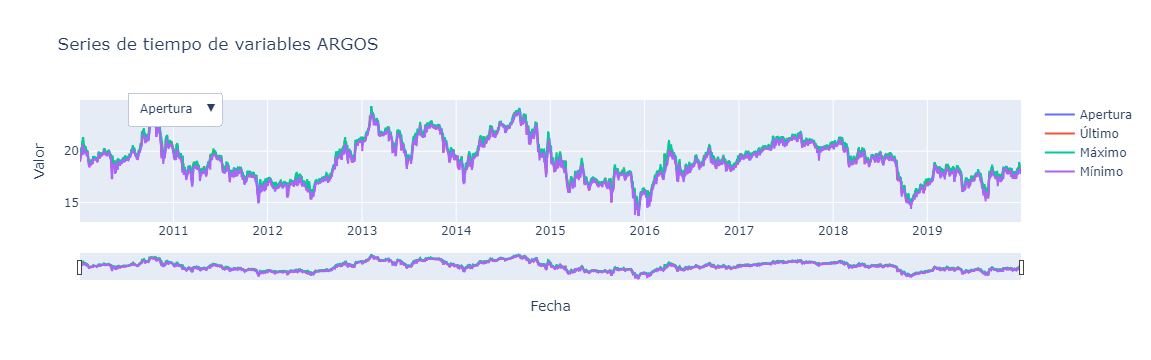

In [12]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Último'], mode='lines', name='Último'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Máximo'], mode='lines', name='Máximo'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Mínimo'], mode='lines', name='Mínimo'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Apertura",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Serie de tiempo variable Apertura"}]),
                dict(label="Último",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Serie de tiempo variable Último"}]),
                dict(label="Máximo",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Serie de tiempo variable Máximo"}]),
                dict(label="Mínimo",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Serie de tiempo variable Mínimo"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables ARGOS')

# Mostrar el gráfico
fig.show()

Del gafico anterio podemos conlcuir que todas las variables se comportan de manera similar en el tiempo explorado, por lo cual la eleccion de la variable en la que nos centraremos no tendra una influencia positiva o negativa en nuestro estudio, sin embargo podemos notar que entre el 2021 y 2022 hubo una caida muy brusca del precio de las acciones del grupo ARGOS lo cual si podra afectar de manera directa los resultados que obtengamos.

In [13]:
# Seleccionar las columnas 'Fecha' y 'Apertura' del DataFrame ARGOS
Serie = ARGOS[['Fecha', 'Apertura']]

# Crear una serie de tiempo con Pandas Time Series (ts)
Apertura = pd.Series(Serie['Apertura'].values, index=Serie['Fecha'])

<h3 style="color: #011f4b;">TRANSFORMACION DE BOX-COX PARA ESTABILIZACION DE LA VARIANZA</h3>

In [14]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [15]:
# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(ARGOS['Apertura'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Apertura, lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 0.17071798004770206
[3.82402513 3.86880216 3.86026874 ... 3.7476868  3.7476868  3.76211352]


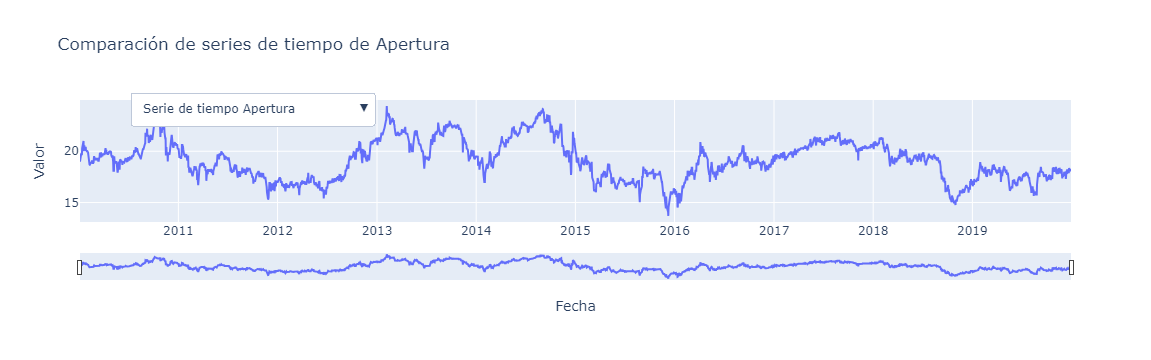

In [16]:
# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Serie de tiempo Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=serie_boxcox, mode='lines', name='Serie de tiempo Apertura-BoxCox', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Serie de tiempo Apertura",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Serie de tiempo Apertura"}]),
                dict(label="Serie de tiempo Apertura-BoxCox",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Serie de tiempo Apertura-BoxCox"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de series de tiempo de Apertura')

# Mostrar el gráfico
fig.show()

A partir de este punto intentaremos mostrar los resultados para ambas series teniendo en cuenta los datos en su escala original y los datos en escala log, esto con la intencion de tener una comparacion más directa sobre lo que puede causar la tranformacion de los datos en los resultados de nuestro ejercicio.

In [17]:
original_data = ARGOS["Apertura"]

<h3 style="color: #011f4b;">DIFERENCIACION DE LA SERIE</h3>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

In [19]:
BoxCox = serie_boxcox

In [20]:
# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'BoxCox': serie_boxcox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

In [21]:
# AR Model para determinar autocorrelación
model_ar = AutoReg(BoxCox, lags=1)
results_ar = model_ar.fit()

# Coeficientes del modelo AR
print("Coeficiente del primer rezago (AR(1)):", results_ar.params[1])

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie original
adf_result_orig = adfuller(BoxCox, maxlag=12, regression="c", autolag="AIC")
print("Resultado de la prueba de Dickey-Fuller para serie original:")
print("Estadístico ADF:", adf_result_orig[0])
print("Valor crítico al 1%:", adf_result_orig[4]['1%'])
print("Valor crítico al 5%:", adf_result_orig[4]['5%'])
print("Valor crítico al 10%:", adf_result_orig[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_orig[1] < 0.05)

Coeficiente del primer rezago (AR(1)): 0.9913023479244938
Resultado de la prueba de Dickey-Fuller para serie original:
Estadístico ADF: -3.1844961312688524
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


In [22]:
# Serie Diferenciada
Diff_BoxCox = np.diff(BoxCox, n=1)

# AR Model para la serie diferenciada
model_ar_diff = AutoReg(Diff_BoxCox, lags=1)
results_ar_diff = model_ar_diff.fit()

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie diferenciada
adf_result_diff = adfuller(Diff_BoxCox, maxlag=12, regression="c", autolag="AIC")
print("\nResultado de la prueba de Dickey-Fuller para serie diferenciada:")
print("Estadístico ADF:", adf_result_diff[0])
print("Valor crítico al 1%:", adf_result_diff[4]['1%'])
print("Valor crítico al 5%:", adf_result_diff[4]['5%'])
print("Valor crítico al 10%:", adf_result_diff[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_diff[1] < 0.05)


Resultado de la prueba de Dickey-Fuller para serie diferenciada:
Estadístico ADF: -20.41941538842336
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


**Conclusión:**

Basándonos en estos resultados, podemos concluir con un alto grado de confianza que la serie diferenciada es estacionaria. Esto significa que:

- La serie no tiene una tendencia creciente o decreciente.
- La varianza de la serie es constante a lo largo del tiempo.
- La estructura de autocorrelación en la serie es constante a lo largo del tiempo.

**Implicaciones:**

- La diferenciación que se aplico a la serie original fue efectiva para convertirla en estacionaria.

**NOTA:** Para revertir las tranformaciones hechas hasta este punto se debe usar las siguientes funciones. 

```python
import numpy as np
from scipy.special import inv_boxcox

# Paso 1: Revertir la diferenciación
# Suponiendo que 'BoxCox' es la serie original antes de la diferenciación
reverted_diff = np.cumsum(np.insert(Diff_BoxCox, 0, BoxCox[0]))

# Paso 2: Revertir la transformación Box-Cox
# 'lmbda' es el parámetro de la transformación Box-Cox utilizada anteriormente
reverted_series = inv_boxcox(reverted_diff, lmbda)
```

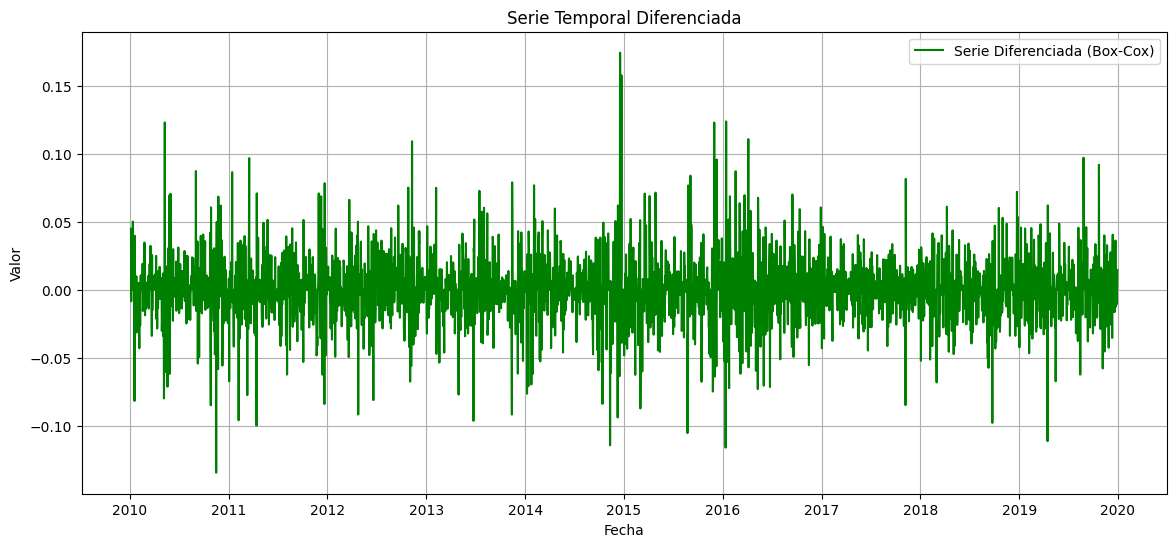

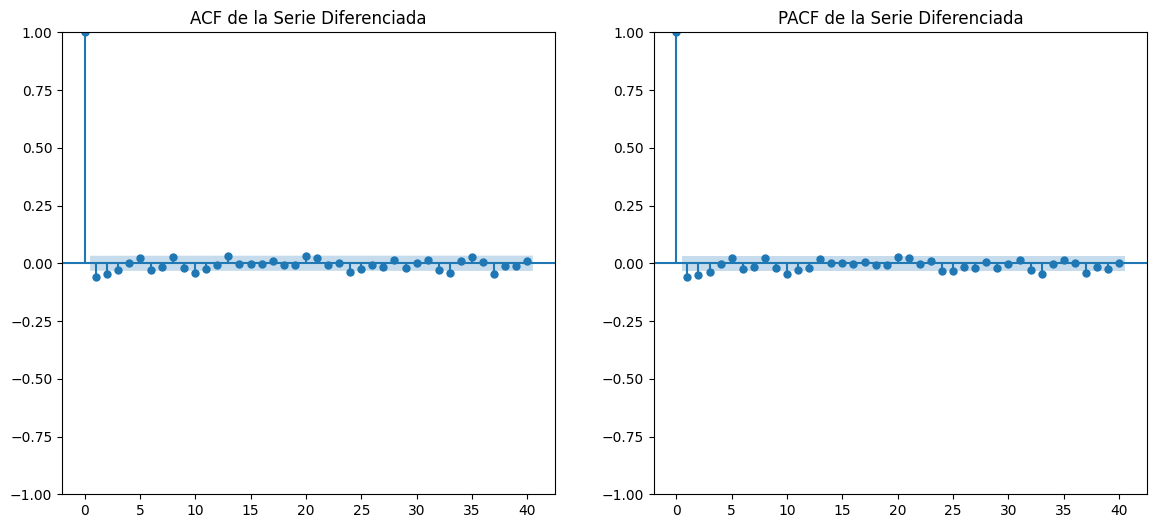

In [23]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear DataFrame para la serie diferenciada con la misma longitud que la serie original
diff_df = pd.DataFrame({'Fecha': ARGOS['Fecha'][1:], 'Diff_BoxCox': Diff_BoxCox})

# Graficar la serie diferenciada
plt.figure(figsize=(14, 6))
plt.plot(diff_df['Fecha'], diff_df['Diff_BoxCox'], label='Serie Diferenciada (Box-Cox)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal Diferenciada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar ACF y PACF para la serie diferenciada
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(Diff_BoxCox, lags=40, ax=plt.gca())
plt.title('ACF de la Serie Diferenciada')

plt.subplot(122)
plot_pacf(Diff_BoxCox, lags=40, method='ywm', ax=plt.gca())
plt.title('PACF de la Serie Diferenciada')

plt.show()

<h3 style="color: #011f4b;">INDICE DE INFORMAICON MUTUA (AMI) </h3>

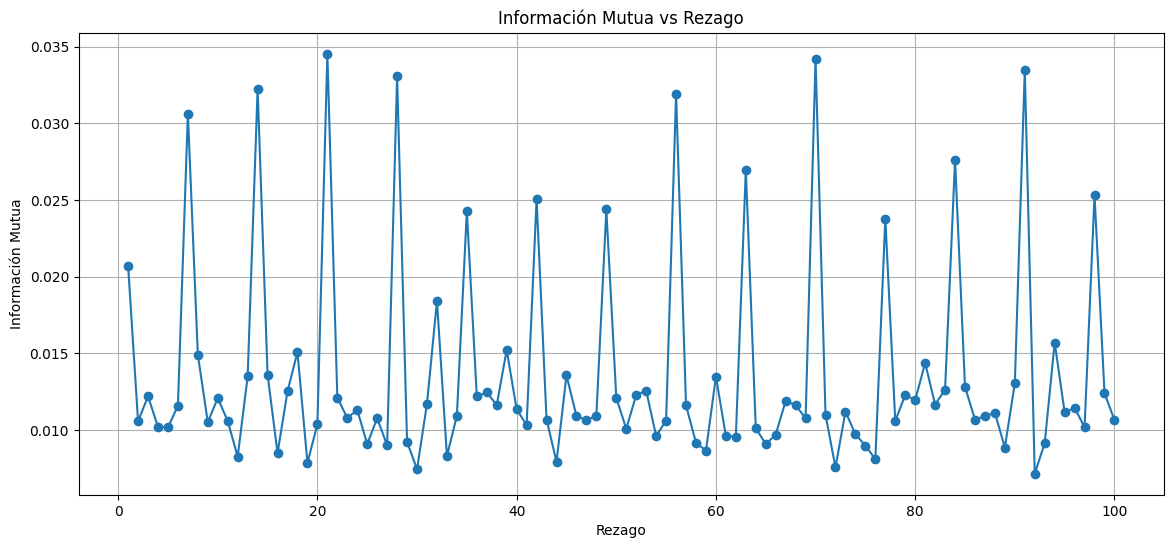

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Función para calcular la información mutua
def mutual_information(x, y, bins=10):
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    hist_x, _ = np.histogram(x, bins=bins, density=True)
    hist_y, _ = np.histogram(y, bins=bins, density=True)
    
    entropy_xy = entropy(hist_xy.flatten())
    entropy_x = entropy(hist_x)
    entropy_y = entropy(hist_y)
    
    mi = entropy_x + entropy_y - entropy_xy
    return mi

# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [
    mutual_information(
        diff_df['Diff_BoxCox'].iloc[:-lag].values,  # Extraer solo la columna 'Diff_BoxCox'
        diff_df['Diff_BoxCox'].iloc[lag:].values
    ) for lag in lag_values
]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(14, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

In [25]:
# Selección de rezagos con alta MI para modelado
high_mi_lags = [lag for lag, mi in zip(lag_values, mutual_info_values) if mi > np.mean(mutual_info_values)]
print(high_mi_lags)

[1, 7, 8, 14, 18, 21, 28, 32, 35, 39, 42, 49, 56, 63, 70, 77, 81, 84, 91, 94, 98]


Notamos que los rezagos semanales tienen una importancia superior en términos de MI para la serie, es decir, esto sugiere tomar aquellos rezagos en orden de 7 días, es decir, los rezagos 7 (Semanal), 14 (Quincenal), 21, 28 (Mensual), 35 y de esa manera consecutivamente. 

<h3 style="color: #011f4b;">DETECCION DE ESTACIONALIDAD</h3>

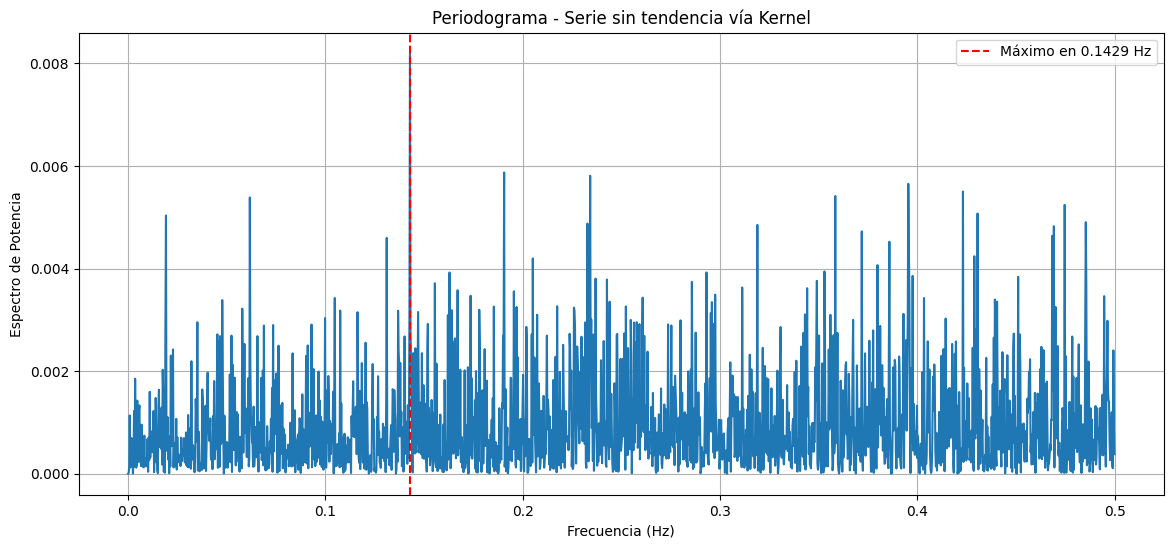

Frecuencia dominante: 0.14
Periodo dominante: 7.00 unidades de tiempo


In [26]:
from scipy.signal import periodogram

# Calcular el periodograma (espectro de potencia) de la serie diferenciada
frequencies, spectrum = periodogram(diff_df['Diff_BoxCox'])

# Encontrar la frecuencia correspondiente al máximo del espectro
max_frequency = frequencies[np.argmax(spectrum)]
periodo = 1 / max_frequency

# Graficar el periodograma
plt.figure(figsize=(14, 6))
plt.plot(frequencies, spectrum)
plt.axvline(max_frequency, color='red', linestyle='--', label=f'Máximo en {max_frequency:.4f} Hz')
plt.title('Periodograma - Serie sin tendencia vía Kernel')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el periodo correspondiente a la frecuencia máxima
print(f'Frecuencia dominante: {max_frequency:.2f}')
print(f'Periodo dominante: {periodo:.2f} unidades de tiempo')

Esto indica que la serie sin tendencia tiene un ciclo dominante que se repite aproximadamente cada 7 unidades de tiempo. Como nuestros datos están en días, esto sugiere una periodicidad de aproximadamente 7 días o dicho de una forma más general la serie posee un ciclo dominante de 7 días.

**IMPORTANTE** - LA CONCLUSION QUE SE DIO NO SOLO SE BASA EN ESTE PEQUEÑO ANALISIS QUE SE MUESTRA EN ESTA PRIMERA PARTE DEL SCRIPT SINO TAMBIEN EN TODO EL ANALISIS DESCRIPTIVO DE LA SERIE QUE SE PRESENTO EN EL SCRIPT [Argos_Exploracion.ipynb] SI SE TIENE ALGUNA DUDA DE LOS METODOS O LA ELECCION DE LOS REZAGOS POR FAVOR MIRAR EL DESARROLLO PROPUESTO EN ESE SCRIPT 

<center><h1 style="color: #011f4b;">ÁRBOLES DE DEDICIÓN SERIE ORIGINAL</h1></center>

Para esta seccion nos proponemos a realizar el analisis a partir de la metodologia de "Arboles de decision" la cual en el contexto de series de temporales nos permiten tener las siguiente herramientas para el analisis: 

- Prediccion de tendencia futuras: Los árboles de decisión pueden ayudar a identificar relaciones complejas entre variables y predecir cómo evolucionará una serie temporal en el futuro.
- Modelado de dependencias temporales: Las series de tiempo suelen estar influenciadas por eventos pasados y tendencias históricas. Los árboles de decisión pueden manejar estas dependencias temporales al considerar múltiples puntos de tiempo como características de entrada.
- Flexibilidad en el tratamiento de datos no lineales: Las series de tiempo pueden exhibir comportamientos no lineales y cambios abruptos. Los árboles de decisión son capaces de modelar relaciones no lineales y segmentar el espacio de características de manera adaptativa.

<h2 style="color: #011f4b;">PREPARACION DE LA SERIE</h2>

In [27]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [28]:
# Seleccionar las columnas 'Fecha' y 'Apertura' del DataFrame ARGOS
Serie = ARGOS[['Fecha', 'Apertura']]
Serie.size

7296

In [29]:
SerieTs = pd.Series(ARGOS['Apertura'].values, index = ARGOS['Fecha'])
SerieDf = pd.DataFrame(ARGOS['Apertura'].values, index = ARGOS['Fecha'])
type(SerieTs)
SerieTs.info()
print(SerieTs)
#type(SerieDf)

<class 'pandas.core.series.Series'>
DatetimeIndex: 3648 entries, 2010-01-04 to 2019-12-30
Series name: None
Non-Null Count  Dtype  
--------------  -----  
3648 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB
Fecha
2010-01-04    18.98
2010-01-05    19.50
2010-01-06    19.40
2010-01-07    19.70
2010-01-08    19.70
              ...  
2019-12-26    18.24
2019-12-27    18.12
2019-12-28    18.12
2019-12-29    18.12
2019-12-30    18.28
Length: 3648, dtype: float64


In [269]:
# Proporciones para entrenamiento, validación y prueba
train_size = int(len(Serie) * 0.5)
validation_size = int(len(Serie) * 0.2)
test_size = len(Serie) - train_size - validation_size

In [270]:
# Asignar datos a cada conjunto
Apertura_train = Serie[:train_size]
Apertura_validation = Serie[train_size:train_size + validation_size]
Apertura_test = Serie[train_size + validation_size:]

In [288]:
# Convertir los conjuntos de entrenamiento y validación a series
Apertura_train_series = Apertura_train['Apertura']
Apertura_validation_series = Apertura_validation['Apertura']

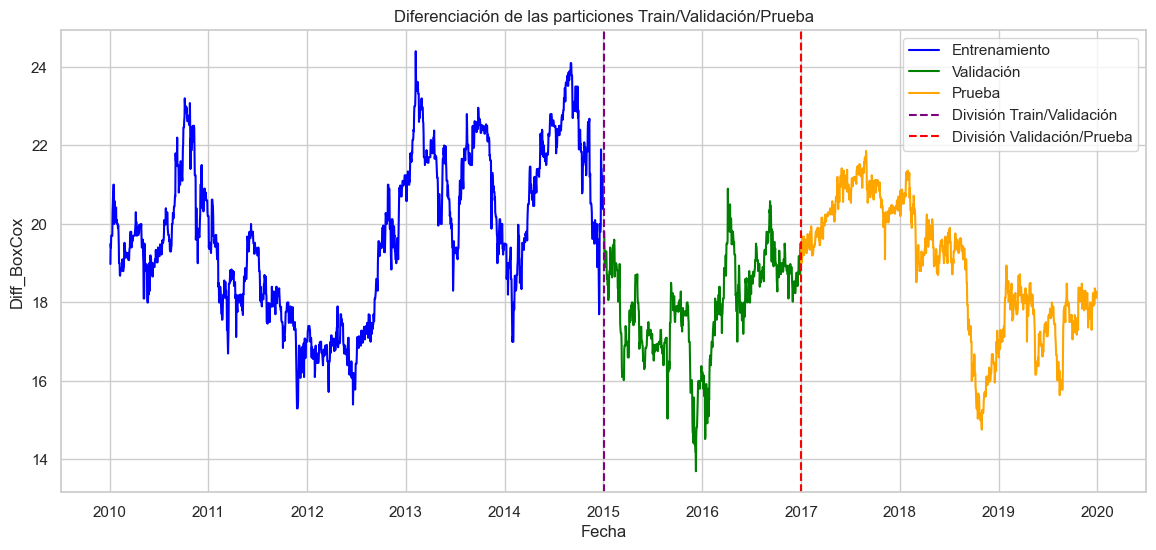

In [272]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear la gráfica
plt.figure(figsize=(14, 6))

# Graficar los datos de entrenamiento
plt.plot(Apertura_train['Fecha'], Apertura_train['Apertura'], 
         label='Entrenamiento', color='blue')

# Graficar los datos de validación
plt.plot(Apertura_validation['Fecha'], Apertura_validation['Apertura'], 
         label='Validación', color='green')

# Graficar los datos de prueba
plt.plot(Apertura_test['Fecha'], Apertura_test['Apertura'], 
         label='Prueba', color='orange')

# Añadir líneas verticales para separar los conjuntos
split_date_validation = Apertura_validation['Fecha'].iloc[0]
split_date_test = Apertura_test['Fecha'].iloc[0]
plt.axvline(x=split_date_validation, color='purple', linestyle='--', label='División Train/Validación')
plt.axvline(x=split_date_test, color='red', linestyle='--', label='División Validación/Prueba')

# Configurar el título y las etiquetas
plt.title('Diferenciación de las particiones Train/Validación/Prueba')
plt.xlabel('Fecha')
plt.ylabel('Diff_BoxCox')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


Como observamos en el grafico anterior vamos a tomar un total del $70\%$ para el conjunto de entrenamiento y un $30\%$ para el conjunto de prueba. 

Tenenemos una baga idea de los rezagos que pueden ser elegido para la tarea de entrenar el árbol de decisión por tanto no disponemos a realizar el entrenamiento del arbol de la siguiennte manera: 
 - Usando la función de ForecasterAutoreg del paquete skforecast.ForecasterAutoreg
 - Para la eleccion de los rezagos no tiene mucho sentido pesar en una periodicidad semanal, pero al hacer el análisis del periodo nos encontramos con que el periodo es de 7 por lo tanto usaremos ese periodo y trateremos de incluir algunos otros rezagos que pueden resultar utiles basandonos en un periodo multiplo de 7
     - Rezagos del 1 al 7 (La ultima semana)
     - Rezagos del 1 al 7 y luego 14, 21, 28 y 30(Semanal hasta completar el mes)
     - Rezagos del 1 al 7 y luego 28, 56, 84 y 112 (Mensual)
     - Rezagos del 1 al 7 y luego rezagos multiplos de 7 hasta el 112

In [273]:
rezagos = [[1],[7],[1,7],
          [1,2,3,4,5,6,7],
          [1,2,3,4,5,6,7,14,21,28,30],
          [1,2,3,4,5,6,7,28,56,84,112],
          [1,2,3,4,5,6,7,14,21,28,35,42,49,56,63,70]]

# Definir los hiperparámetros para la búsqueda
hiperparametros = {
    'max_depth': list(range(5, 12)),
    'min_samples_leaf': list(range(20, 30)),
    #'min_samples_split': list(range(2, 20)),
    #'max_features': [None, 'sqrt', 'log2'],
    #'max_leaf_nodes': list(range(10, 100, 10)),
    #'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

In [274]:
DT_Apertura = ForecasterAutoreg(
    regressor = DecisionTreeRegressor(random_state = 123),
    lags = 7 
)

In [275]:
# Realizar la búsqueda de hiperparámetros usando solo los conjuntos de entrenamiento y validación
tuning = grid_search_forecaster(
    forecaster=DT_Apertura,
    y=pd.concat([Apertura_train_series, Apertura_validation_series]),
    param_grid=hiperparametros,
    lags_grid=rezagos,
    steps=1,
    refit=True,
    metric='mean_squared_error',
    initial_train_size=len(Apertura_train_series),
    fixed_train_size=False,
    return_best=True,
    verbose=False,
    show_progress=True
)

Number of models compared: 1470.


lags grid:   0%|          | 0/7 [00:00<?, ?it/s]

params grid:   0%|          | 0/210 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1] 
  Parameters: {'ccp_alpha': 0.0, 'max_depth': 8, 'min_samples_leaf': 21}
  Backtesting metric: 0.09323134668274129



In [277]:
import joblib

# Extraer los parámetros de DecisionTreeRegressor de best_params
relevant_params = {k: v for k, v in best_params.items() if k in ['max_depth', 'min_samples_leaf', 'min_samples_split', 'ccp_alpha']}

# Ajustar el modelo con los hiperparámetros relevantes
DT_Apertura.regressor.set_params(**relevant_params)
DT_Apertura.fit(Apertura_train_series)

# Guardar el modelo ajustado en un archivo
joblib.dump(DT_Apertura, 'BMTR_Apert1.pkl')

['BMTR_Apert1.pkl']

In [278]:
import pickle

# Guardar el modelo ajustado usando pickle
with open('BMTR_Apert1.pkl', 'wb') as file:
    pickle.dump(DT_Apertura, file)

In [279]:
tuning = tuning.sort_values(by = ['mean_squared_error', 'max_depth', 'min_samples_leaf'])
tuning

lags lags_label                                             params  \
31   [1]        [1]  {'ccp_alpha': 0.0, 'max_depth': 8, 'min_sample...   
41   [1]        [1]  {'ccp_alpha': 0.0, 'max_depth': 9, 'min_sample...   
51   [1]        [1]  {'ccp_alpha': 0.0, 'max_depth': 10, 'min_sampl...   
61   [1]        [1]  {'ccp_alpha': 0.0, 'max_depth': 11, 'min_sampl...   
21   [1]        [1]  {'ccp_alpha': 0.0, 'max_depth': 7, 'min_sample...   
..   ...        ...                                                ...   
415  [7]        [7]  {'ccp_alpha': 0.1, 'max_depth': 11, 'min_sampl...   
416  [7]        [7]  {'ccp_alpha': 0.1, 'max_depth': 11, 'min_sampl...   
417  [7]        [7]  {'ccp_alpha': 0.1, 'max_depth': 11, 'min_sampl...   
418  [7]        [7]  {'ccp_alpha': 0.1, 'max_depth': 11, 'min_sampl...   
419  [7]        [7]  {'ccp_alpha': 0.1, 'max_depth': 11, 'min_sampl...   

     mean_squared_error  ccp_alpha  max_depth  min_samples_leaf  
31             0.093231        0.0        8.0              21.0  
41             0.093242        0.0        9.0              21.0  
51             0.093242        0.0       10.0              21.0  
61             0.093242        0.0       11.0              21.0  
21             0.093250        0.0        7.0              21.0  
..                  ...        ...        ...               ...  
415            0.719938        0.1       11.0              25.0  
416            0.719938        0.1       11.0              26.0  
417            0.719938        0.1       11.0              27.0  
418            0.719938        0.1       11.0              28.0  
419            0.719938        0.1       11.0              29.0  

[1470 rows x 7 columns]

In [280]:
tuning1 = tuning[0:1]
tuning1['model'] = 'decission tree'
tuning1

lags lags_label                                             params  \
31  [1]        [1]  {'ccp_alpha': 0.0, 'max_depth': 8, 'min_sample...   

    mean_squared_error  ccp_alpha  max_depth  min_samples_leaf           model  
31            0.093231        0.0        8.0              21.0  decission tree

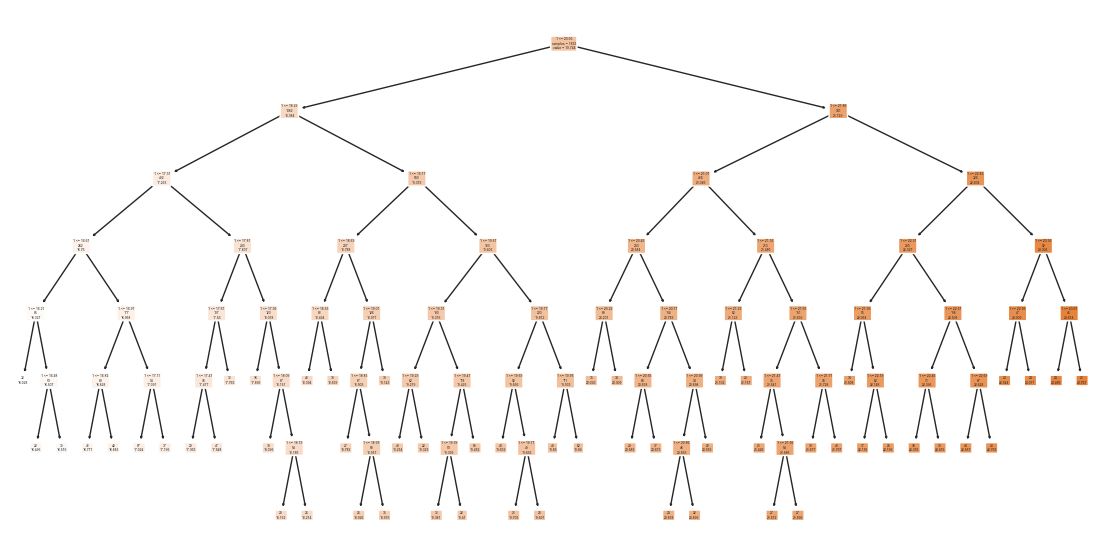

In [281]:
# Crear una visualización del árbol
plot.figure(figsize=(14,7))
plot_tree(DT_Apertura.regressor, #max_depth = 5,
          filled=True, feature_names=DT_Apertura.lags, rounded = True,
          impurity = False, label = 'root')
plot.show()

In [282]:
DT_Apertura.get_feature_importances()['importance']

0    1.0
Name: importance, dtype: float64

In [284]:
DT_Apertura = ForecasterAutoreg(
    regressor = DecisionTreeRegressor(random_state = 123, max_depth=8, min_samples_leaf=21, ccp_alpha= 0.0),
    lags = 4
)

DT_Apertura.fit(Apertura_train_series)

In [292]:
predicciones = DT_Apertura.predict(3648)
predicciones

1824    20.309412
1825    20.309412
1826    20.309412
1827    20.309412
1828    20.309412
          ...    
5467    20.309412
5468    20.309412
5469    20.309412
5470    20.309412
5471    20.309412
Name: pred, Length: 3648, dtype: float64

In [286]:
MSE = mean_squared_error(y_true = Apertura_test_series, y_pred =predicciones)

tuning1['MSE test'] =  MSE
tuning1

lags lags_label                                             params  \
31  [1]        [1]  {'ccp_alpha': 0.0, 'max_depth': 8, 'min_sample...   

    mean_squared_error  ccp_alpha  max_depth  min_samples_leaf  \
31            0.093231        0.0        8.0              21.0   

             model    MSE test  
31  decission tree  412.476499

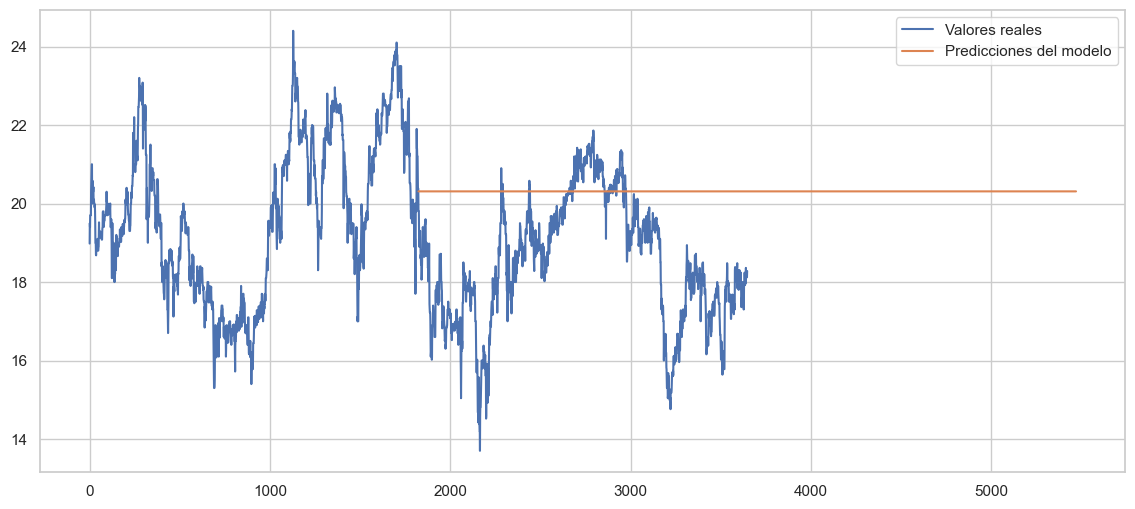

In [293]:
plt.figure(figsize=(14, 6))
plt.plot(Serie['Apertura'], label='Valores reales')
plt.plot(predicciones, label='Predicciones del modelo')
plt.legend()
plt.show()

In [30]:
df1 = pd.DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [31]:
# Generar los primeros 7 rezagos
for i in range(1, 0, -1):
    df1['t-'+str(i)] = SerieTs.shift(i)

# Generar rezagos que son múltiplos de 7 hasta 70
#for i in range(7, 70, 7):
#    df1['t-'+str(i)] = SerieTs.shift(i)

# Imprimir el DataFrame resultante
print(df1)

              t-1
Fecha            
2010-01-04    NaN
2010-01-05  18.98
2010-01-06  19.50
2010-01-07  19.40
2010-01-08  19.70
...           ...
2019-12-26  18.22
2019-12-27  18.24
2019-12-28  18.12
2019-12-29  18.12
2019-12-30  18.12

[3648 rows x 1 columns]


In [32]:
# Create column t
df1['t'] = SerieTs.values
print(df1.head(13))

              t-1      t
Fecha                   
2010-01-04    NaN  18.98
2010-01-05  18.98  19.50
2010-01-06  19.50  19.40
2010-01-07  19.40  19.70
2010-01-08  19.70  19.70
2010-01-09  19.70  19.70
2010-01-10  19.70  19.70
2010-01-11  19.70  19.70
2010-01-12  19.70  20.30
2010-01-13  20.30  20.50
2010-01-14  20.50  20.80
2010-01-15  20.80  21.00
2010-01-16  21.00  21.00


In [33]:
df2 = df1[1:]
print(df2)
df2.size

              t-1      t
Fecha                   
2010-01-05  18.98  19.50
2010-01-06  19.50  19.40
2010-01-07  19.40  19.70
2010-01-08  19.70  19.70
2010-01-09  19.70  19.70
...           ...    ...
2019-12-26  18.22  18.24
2019-12-27  18.24  18.12
2019-12-28  18.12  18.12
2019-12-29  18.12  18.12
2019-12-30  18.12  18.28

[3647 rows x 2 columns]


7294

In [34]:
# Split data
df3 = df2.values
X1= df3[:, 0:-1]  
y1 =df3[:,-1]  
print(X1)
print(y1)

[[18.98]
 [19.5 ]
 [19.4 ]
 ...
 [18.12]
 [18.12]
 [18.12]]
[19.5  19.4  19.7  ... 18.12 18.12 18.28]


In [35]:
print(X1[1])
print(y1[1])

[19.5]
19.4


In [36]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 3647
2552 364 729
Train + Validation + Test: 3645


In [37]:
Y1 = y1
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)+1# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 3647
Training Observations for Target: 2552
Validation Observations for Target: 365
Test Observations for Target: 730


In [38]:
# Features Train--Val-Test split

trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 3647
Training Observations for Feature: 2552
Validation Observations for Feature: 365
Test Observations for Feature: 730


In [39]:
from sklearn.tree import DecisionTreeRegressor

DT_Apertura = DecisionTreeRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: 0.9856032565017103
Coeficiente R2 sobre el conjunto de Validación: 0.8735478672501116
el RECM sobre validación es: 0.05112791449771735


- El R^2 = 1 indica que el modelo está ajustando perfectamente a los datos de entrenamiento, esto significa que el modelo puede explicar el 100% de la variabilidad en este conjunto; sin embargo, esto puede ser señal de sobre ajuste
- El R^2 en el conjunto de validación es considerablemente más bajo que en el conjunto de entrenamiento (0.644 vs 1.0). Esto sugiere que el modelo no generaliza bien a nuevos datos. Aunque todavía está capturando una cantidad significativa de variabilidad (alrededor del 64.4%), la caída en el desempeño comparado con el conjunto de entrenamiento es un indicio de que el modelo podría estar sobre ajustado.
- El RECM (Raíz del Error Cuadrático Medio) es una medida de la magnitud promedio del error de las predicciones del modelo en el conjunto de validación. Un RECM más bajo indica mejores predicciones. En este caso, el RECM de 0.109 sugiere que, en promedio, las predicciones del modelo están desviándose en alrededor de 0.109 unidades del valor real en el conjunto de validación.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convertir val_target a una serie de pandas
val_target_series = pd.Series(val_target)

# Calcular la media y desviación estándar
train_mean = np.mean(train_target)
train_std = np.std(train_target)
val_mean = np.mean(val_target)
val_std = np.std(val_target)

print(f"Media de entrenamiento: {train_mean}")
print(f"Desviación estándar de entrenamiento: {train_std}")
print(f"Media de validación: {val_mean}")
print(f"Desviación estándar de validación: {val_std}")

Media de entrenamiento: 19.213048589341692
Desviación estándar de entrenamiento: 1.9888494297119148
Media de validación: 20.4826301369863
Desviación estándar de validación: 0.6358665214212529


El hecho de que el RECM del modelo (0.124789) sea significativamente menor que la desviación estándar de la validación (0.554668) y menor que el RECM del modelo de persistencia (0.199976) indica que el modelo está capturando bien la variabilidad de los datos.

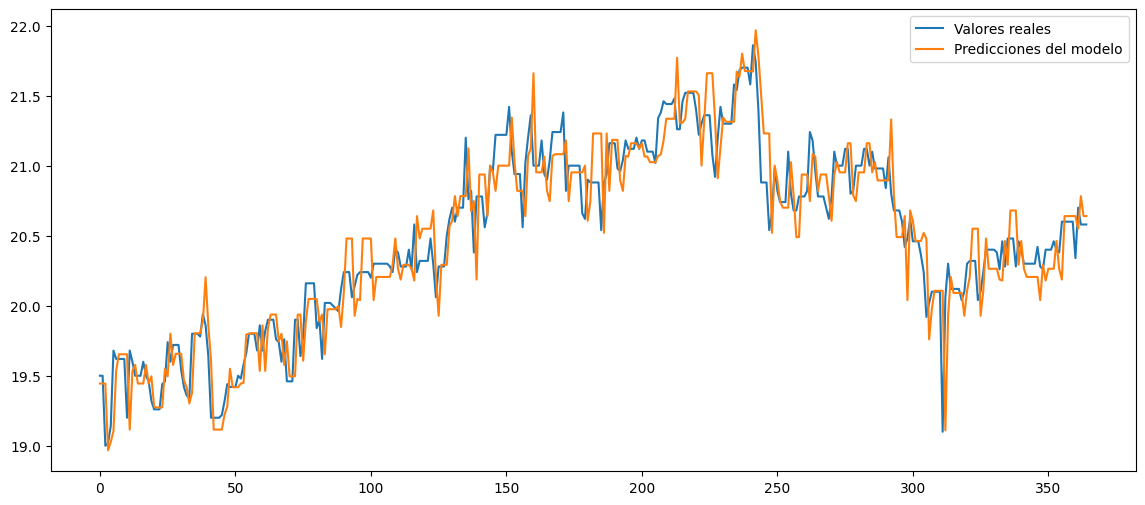

In [41]:
val_predictions = DT_Apertura.predict(val_feature)

plt.figure(figsize=(14, 6))
plt.plot(val_target, label='Valores reales')
plt.plot(val_predictions, label='Predicciones del modelo')
plt.legend()
plt.show()

In [42]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear un DataFrame para almacenar los resultados
tuning_results = pd.DataFrame(columns=['max_depth', 'steps', 'R2_train', 'R2_val', 'RMSE_val'])

# Definir los valores de max_depth y pasos que deseas probar
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9]
steps_ahead = [1]

# Función para crear características para pasos adelante
def create_lagged_features(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:(i + steps)])
        y.append(data[i + steps])
    return np.array(X), np.array(y)

for steps in steps_ahead:
    best_rmse = float('inf')
    best_model = None
    best_params = None
    
    for depth in max_depth_values:
        print(f'{"="*12} Entrenando el modelo con max_depth={depth} y {steps} pasos adelante {"="*12}')
        
        # Crear características y objetivos para el número de pasos adelante
        train_X, train_y = create_lagged_features(train_feature.flatten(), steps)
        val_X, val_y = create_lagged_features(val_feature.flatten(), steps)

        # Crear y ajustar el modelo
        AperturaDT = DecisionTreeRegressor(max_depth=depth)
        AperturaDT.fit(train_X, train_y)

        # Evaluar el modelo
        R2_train = AperturaDT.score(train_X, train_y)
        R2_val = AperturaDT.score(val_X, val_y)
        RMSE_val = mean_squared_error(val_y, AperturaDT.predict(val_X), squared=False)

        # Almacenar los mejores resultados
        if RMSE_val < best_rmse:
            best_rmse = RMSE_val
            best_model = AperturaDT
            best_params = (depth, steps, R2_train, R2_val, RMSE_val)

    # Almacenar los mejores resultados en el DataFrame usando loc
    tuning_results.loc[len(tuning_results)] = best_params
    print(f"Mejor modelo para {steps} pasos adelante:")
    print(f"max_depth={best_params[0]}")
    print(f"Coeficiente R2 sobre el conjunto de entrenamiento: {best_params[2]}")
    print(f"Coeficiente R2 sobre el conjunto de validación: {best_params[3]}")
    print(f"RECM sobre el conjunto de validación: {best_params[4]}\n")

# Mostrar los resultados finales
print("Resultados del tuning de max_depth y pasos adelante:")
print(tuning_results)

============ Entrenando el modelo con max_depth=2 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=3 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=4 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=5 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=6 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=7 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=8 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=9 y 1 pasos adelante ============
Mejor modelo para 1 pasos adelante:
max_depth=5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9824521545739541
Coeficiente R2 sobre el conjunto de validación: 0.9079703081655025
RECM sobre el conjunto de validación: 0.19315755312132596

Resultados del tuning de max_depth y pasos adelante:
   max_depth  steps  R2_train   R2_val  RMSE_va

En nuestro caso, de estos modelos explorador 1 paso adelante con varias profundidades el mejor encontrado basándonos en aquel que tuviese menor RMSE fue aquel que utiliza un **max_depth** de 5, el cual da un **R^2** en entramiento de 0.895, un **R^2** en validacion de 0.40 y un **RSME** de 0.38

In [43]:
# Importar la función para poda por complejidad de costo
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Obtener el mejor modelo encontrado
best_max_depth = 5  # Cambiar según el mejor resultado obtenido
best_steps = 1      # Cambiar según el mejor resultado obtenido

# Crear y ajustar el modelo con el mejor max_depth y steps
AperturaDT = DecisionTreeRegressor(max_depth=best_max_depth)
train_X, train_y = create_lagged_features(train_feature.flatten(), best_steps)
val_X, val_y = create_lagged_features(val_feature.flatten(), best_steps)
AperturaDT.fit(train_X, train_y)

# Obtener el camino de poda por complejidad de costo
path = AperturaDT.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Imprimir las alphas encontradas
print("Alphas encontradas:", ccp_alphas)
print("Alpha mínimo:", ccp_alphas.min())
print("Alpha máximo:", ccp_alphas.max())

# Definir el número de divisiones para explorar las alphas
div = 25

Alphas encontradas: [0.00000000e+00 1.47899483e-04 3.46835417e-04 3.86729990e-04
 4.85734132e-04 5.39377842e-04 5.55278820e-04 7.49463927e-04
 7.79288917e-04 1.03626679e-03 1.26609228e-03 1.40514593e-03
 1.52690018e-03 1.68255271e-03 2.06432545e-03 2.48944437e-03
 2.85176130e-03 3.35661806e-03 3.84240352e-03 4.65921938e-03
 5.33611718e-03 1.07291315e-02 1.42194390e-02 1.49701107e-02
 2.12271186e-02 4.37018117e-02 5.14121618e-02 6.48847087e-02
 8.03577873e-02 3.99312888e-01 5.16954182e-01 2.63432601e+00]
Alpha mínimo: 0.0
Alpha máximo: 2.634326013105631


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Obtener el camino de poda por complejidad de costo
path = AperturaDT.cost_complexity_pruning_path(train_feature, train_target)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Lista para almacenar los RMSE de entrenamiento y prueba
rmse_train, rmse_test = [], []

# Iterar sobre los valores de alpha
for alpha in ccp_alphas:
    # Crear y ajustar el modelo con el valor de alpha actual
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    tree.fit(train_feature, train_target)
    
    # Predecir sobre conjunto de entrenamiento y validación
    y_train_pred = tree.predict(train_feature)
    y_val_pred = tree.predict(val_feature)

    # Calcular el RMSE
    rmse_train.append(np.sqrt(mean_squared_error(train_target, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(val_target, y_val_pred)))

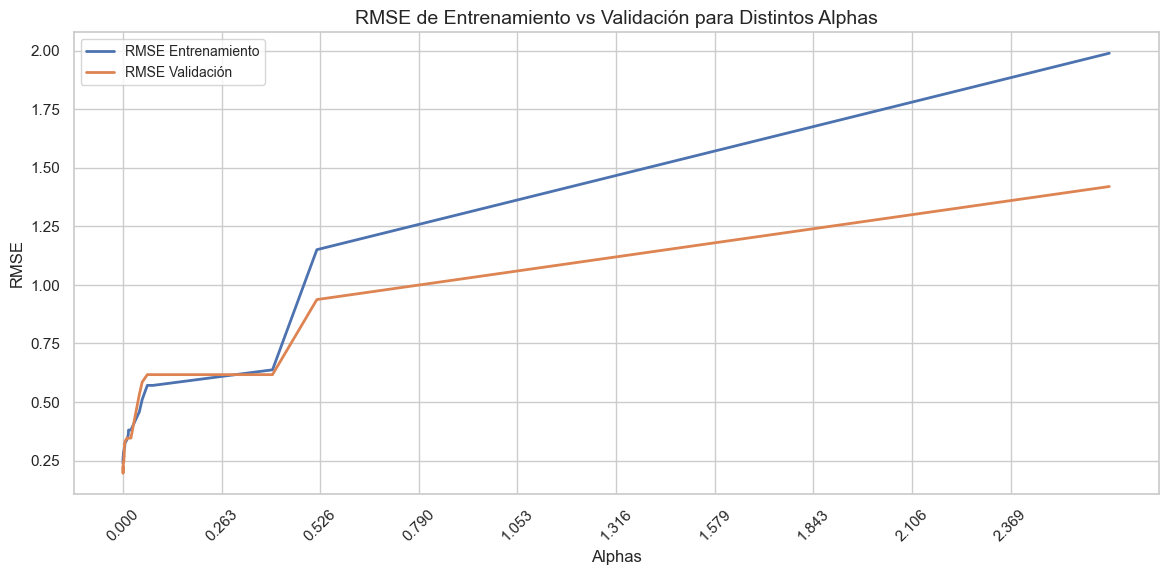

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura y un eje de tamaño adecuado
plt.figure(figsize=(14, 6))

# Graficar las líneas de entrenamiento y prueba
sns.lineplot(x=ccp_alphas, y=rmse_train, label="RMSE Entrenamiento", linewidth=2)
sns.lineplot(x=ccp_alphas, y=rmse_test, label="RMSE Validación", linewidth=2)

# Personalizar etiquetas y título
plt.xlabel("Alphas", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE de Entrenamiento vs Validación para Distintos Alphas", fontsize=14)

# Configurar la leyenda
plt.legend(fontsize=10)

# Ajustar las marcas del eje x para que sean más legibles
div = 10  # Divisor para determinar la cantidad de marcas en el eje x
plt.xticks(np.arange(0.00, ccp_alphas.max(), (ccp_alphas.max() - ccp_alphas.min()) / div), rotation=45)

# Mostrar el gráfico
plt.show()

Este gráfico nos indica como varía la precisión del modelo  en los datos de prueba y entrenamiento a medida que cambian los valores de alpha. Al ver que las curvas o las líneas son ascendente para ambos conjuntos podemos concluir que el modelo mejora su rendimiento al aumentar los valores de alpha, al parecer no existe una brecha significativa por lo que podemos inferir que no existe un sobre ajuste en el modelo.

In [46]:
0.544 - 0.272

0.272

In [47]:
####
print(train_feature.shape)
print(val_feature.shape)

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)

(2552, 1)
(365, 1)
(2552,)
(365,)
(2917, 1)
(2917,)


In [48]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth
AperturaDT2 = DecisionTreeRegressor(max_depth=5)  

# Ajustar el modelo con los datos de entrenamiento y validación combinados
AperturaDT2.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction = AperturaDT2.predict(train_val_feature)
test_prediction = AperturaDT2.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse = sklearn.metrics.mean_squared_error(train_val_prediction, train_val_target, squared=False)
test_rmse = sklearn.metrics.mean_squared_error(test_prediction, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse)

Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 0.2542930360288964
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 0.23409174699208138


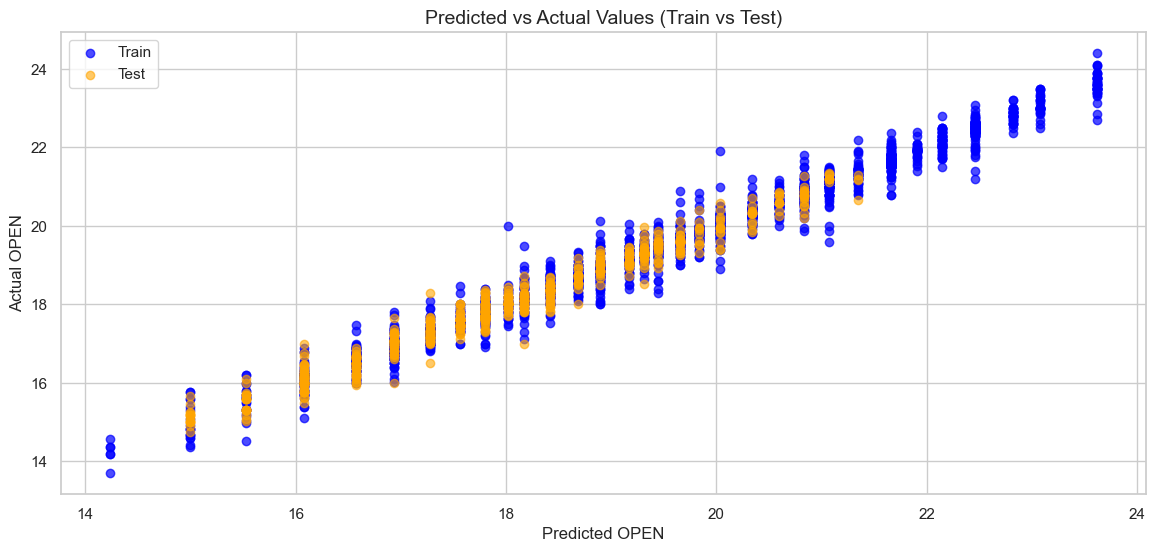

In [49]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(14, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction, test_target, color='orange', alpha=0.6, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=14)
plt.xlabel('Predicted OPEN', fontsize=12)
plt.ylabel('Actual OPEN', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.show()

In [50]:
from sklearn import tree
import matplotlib.pyplot as plt

# Lista de características y respuesta
listacaract = list(df1.columns.values)
respuesta = listacaract.pop()  # Suponemos que 'respuesta' es el nombre de la columna que quieres predecir

# Crear el árbol de decisión
AperturaDT1 = DecisionTreeRegressor(max_depth= 5)  # Aquí debes definir tu modelo DecisionTreeRegressor
AperturaDT1.fit(df1[listacaract], df1[respuesta])

# Mostrar el texto de representación del árbol
text_representation = tree.export_text(AperturaDT1)
print(text_representation)

|--- feature_0 <= 19.03
|   |--- feature_0 <= 17.41
|   |   |--- feature_0 <= 16.31
|   |   |   |--- feature_0 <= 15.71
|   |   |   |   |--- feature_0 <= 15.02
|   |   |   |   |   |--- value: [14.77]
|   |   |   |   |--- feature_0 >  15.02
|   |   |   |   |   |--- value: [15.45]
|   |   |   |--- feature_0 >  15.71
|   |   |   |   |--- feature_0 <= 16.06
|   |   |   |   |   |--- value: [15.97]
|   |   |   |   |--- feature_0 >  16.06
|   |   |   |   |   |--- value: [16.24]
|   |   |--- feature_0 >  16.31
|   |   |   |--- feature_0 <= 16.97
|   |   |   |   |--- feature_0 <= 16.69
|   |   |   |   |   |--- value: [16.53]
|   |   |   |   |--- feature_0 >  16.69
|   |   |   |   |   |--- value: [16.86]
|   |   |   |--- feature_0 >  16.97
|   |   |   |   |--- feature_0 <= 17.11
|   |   |   |   |   |--- value: [17.01]
|   |   |   |   |--- feature_0 >  17.11
|   |   |   |   |   |--- value: [17.28]
|   |--- feature_0 >  17.41
|   |   |--- feature_0 <= 18.25
|   |   |   |--- feature_0 <= 17.81
|   

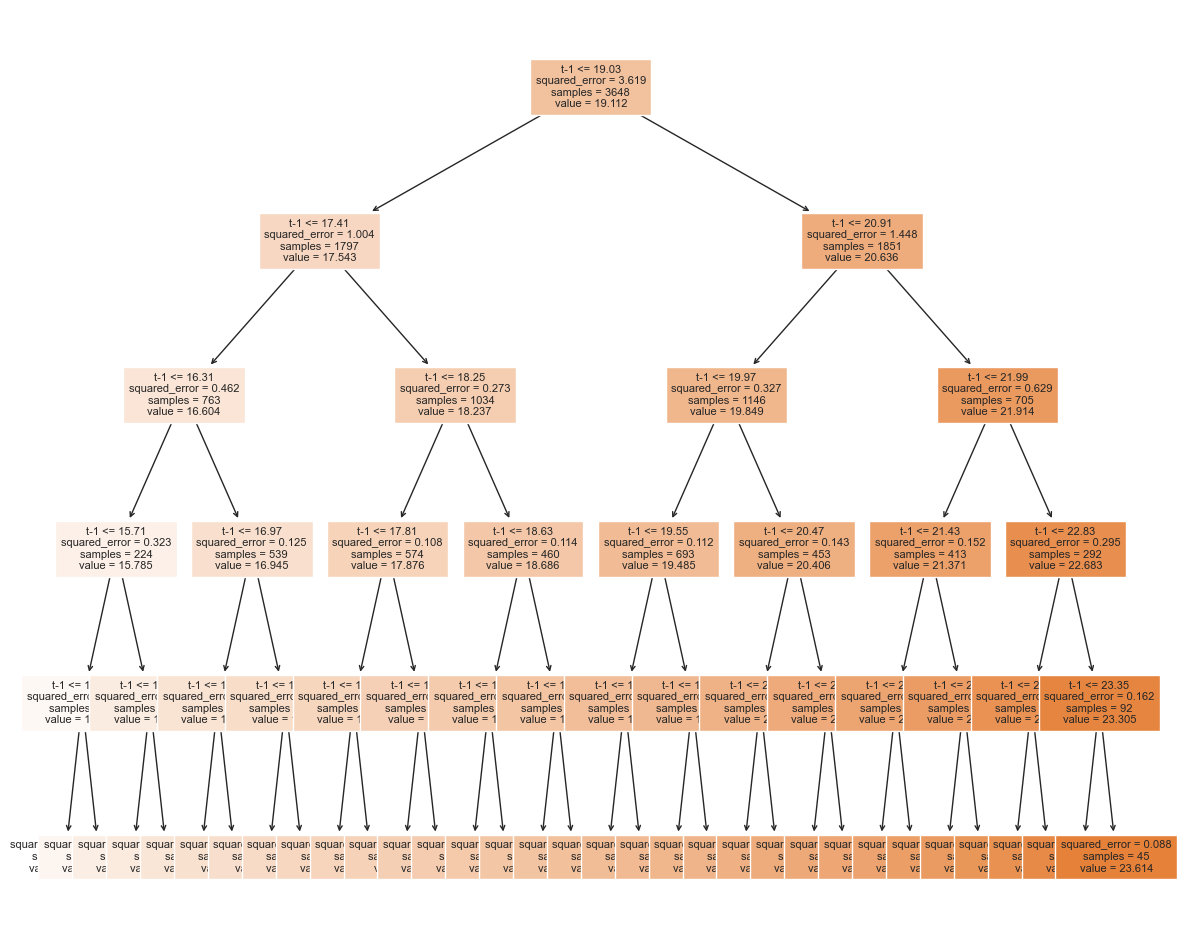

In [51]:
# Configurar y mostrar el gráfico del árbol de decisión
plt.figure(figsize=(14, 12))
_ = tree.plot_tree(AperturaDT1, 
                   feature_names=listacaract, 
                   fontsize= 8,
                   filled=True)

# Mostrar el gráfico
plt.show()

In [52]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

2917
2917
730
730


In [53]:
indicetrian_val_test=df1.index
print(indicetrian_val_test.size)
indicetrain_val=indicetrian_val_test[0:2622]
indicetest=indicetrian_val_test[2622:3648]

3648


In [54]:
print(indicetrain_val.size)
print(indicetest.size)

2622
1026


In [55]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

3647
3647


In [56]:
# Recortar el índice para que coincida con la longitud de los datos
indicetrian_val_test_recortado = indicetrian_val_test[:3647]

# Crear el DataFrame utilizando los datos y el índice recortados
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred = pd.DataFrame(data=d, index=indicetrian_val_test_recortado)

# Mostrar el DataFrame resultante
print(ObsvsPred.head(10))

            observado  Predicción
Fecha                            
2010-01-04       19.5   18.896076
2010-01-05       19.4   19.448062
2010-01-06       19.7   19.448062
2010-01-07       19.7   19.657692
2010-01-08       19.7   19.657692
2010-01-09       19.7   19.657692
2010-01-10       19.7   19.657692
2010-01-11       20.3   19.657692
2010-01-12       20.5   20.335345
2010-01-13       20.8   20.594462


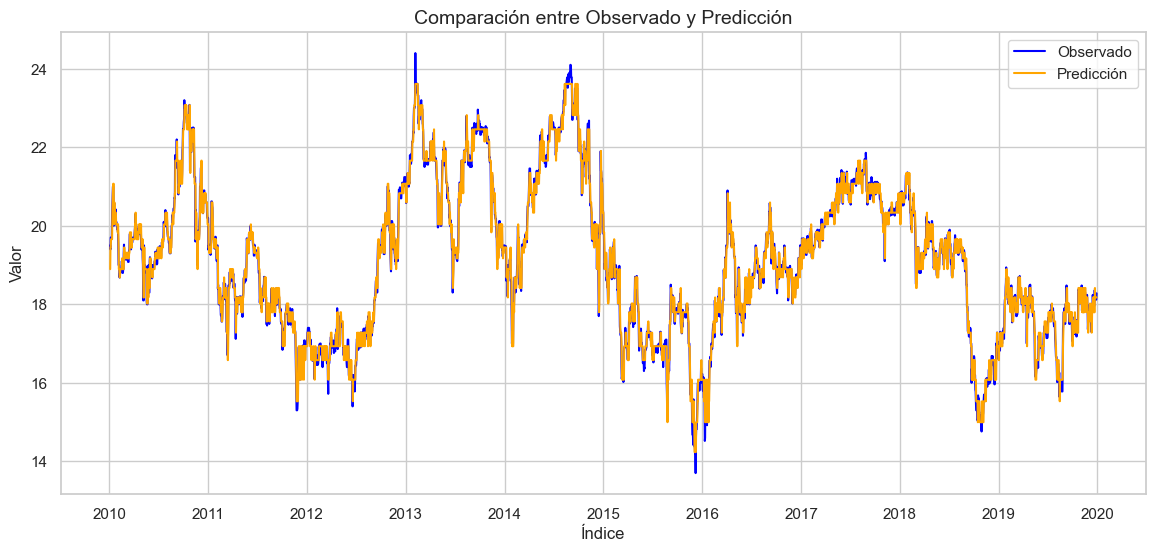

In [57]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(14, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred['observado'], label='Observado', color='blue', linestyle='-')
plt.plot(ObsvsPred['Predicción'], label='Predicción', color='orange', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


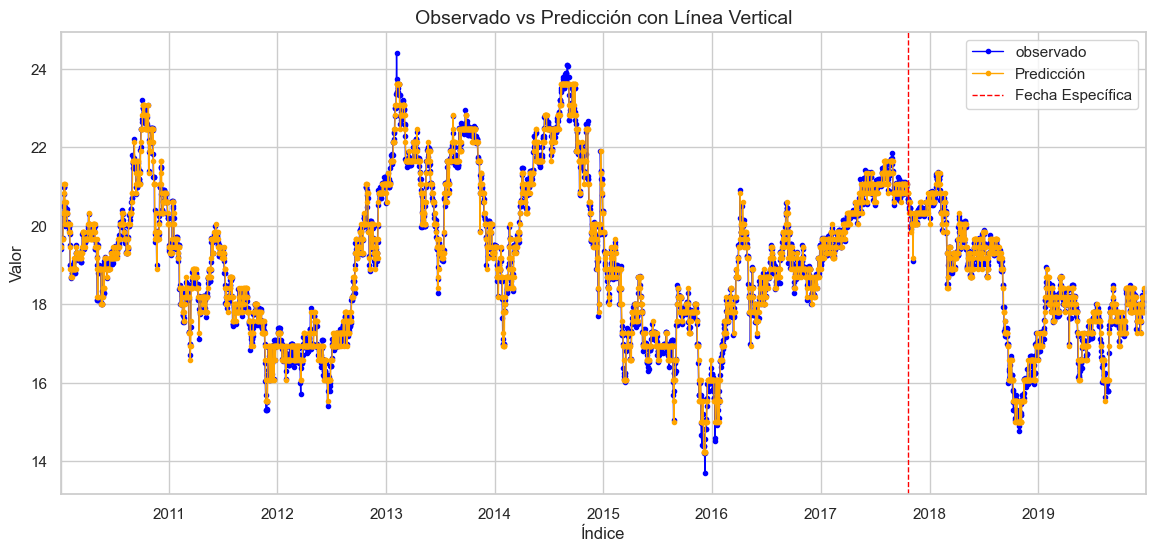

In [58]:
import matplotlib.pyplot as plt

# Configuración del gráfico utilizando Pandas plot y Matplotlib
ax = ObsvsPred.plot(marker=".", figsize=(14, 6), color=['blue', 'orange'], linewidth = 1)  # Cambiar colores de 'observado' y 'predicción'

# Añadir línea vertical en una fecha específica
fecha_vertical = indicetrian_val_test[2848].date()  # Fecha específica para la línea vertical
ax.axvline(x=fecha_vertical, color='red', linestyle='--', linewidth = 1, label='Fecha Específica')

# Ajustar etiquetas y título del gráfico
plt.title('Observado vs Predicción con Línea Vertical', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Añadir leyenda al gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

In [59]:
# Extraer los valores observados y las predicciones
observed = ObsvsPred['observado']
predicted = ObsvsPred['Predicción']

# Calcular el MSE
mse = mean_squared_error(observed, predicted)

# Calcular el RMSE
rmse = np.sqrt(mse)

# Mostrar los resultados
print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)

Error Cuadrático Medio (MSE): 0.06269012459753119
Raíz del Error Cuadrático Medio (RMSE): 0.2503799604551674


<center><h1 style="color: #011f4b;">ÁRBOLES DE DEDICIÓN SERIE DIFERENCIADA </h1></center>

In [101]:
# Manejo de datos en general
import pandas as pd
import numpy as np

# Para poder graficar
import matplotlib.pyplot as plot

# Construcción del árbol de decisión
from sklearn.tree import DecisionTreeRegressor

# Tuning del árbol
from skforecast.ForecasterAutoreg import ForecasterAutoreg

# Medidas de precisión
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Para el ajuste de hiperparámetros
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

# Para mostrar la estructura del árbol
from sklearn.tree import plot_tree

# Escalado de los datos:
from sklearn.preprocessing import MinMaxScaler

In [108]:
DIFF = diff_df
print(DIFF.head())
type(DIFF)

       Fecha  Diff_BoxCox
1 2010-01-05     0.044777
2 2010-01-06    -0.008533
3 2010-01-07     0.025492
4 2010-01-08     0.000000
5 2010-01-09     0.000000


pandas.core.frame.DataFrame

In [204]:
# Proporciones para entrenamiento, validación y prueba
train_size = int(len(DIFF) * 0.5)
validation_size = int(len(DIFF) * 0.2)
test_size = len(DIFF) - train_size - validation_size

In [205]:
# Asignar datos a cada conjunto
Apertura_train = DIFF[:train_size]
Apertura_validation = DIFF[train_size:train_size + validation_size]
Apertura_test = DIFF[train_size + validation_size:]

In [206]:
# Convertir los conjuntos de entrenamiento y validación a series
Apertura_train_series = Apertura_train['Diff_BoxCox']
Apertura_validation_series = Apertura_validation['Diff_BoxCox']

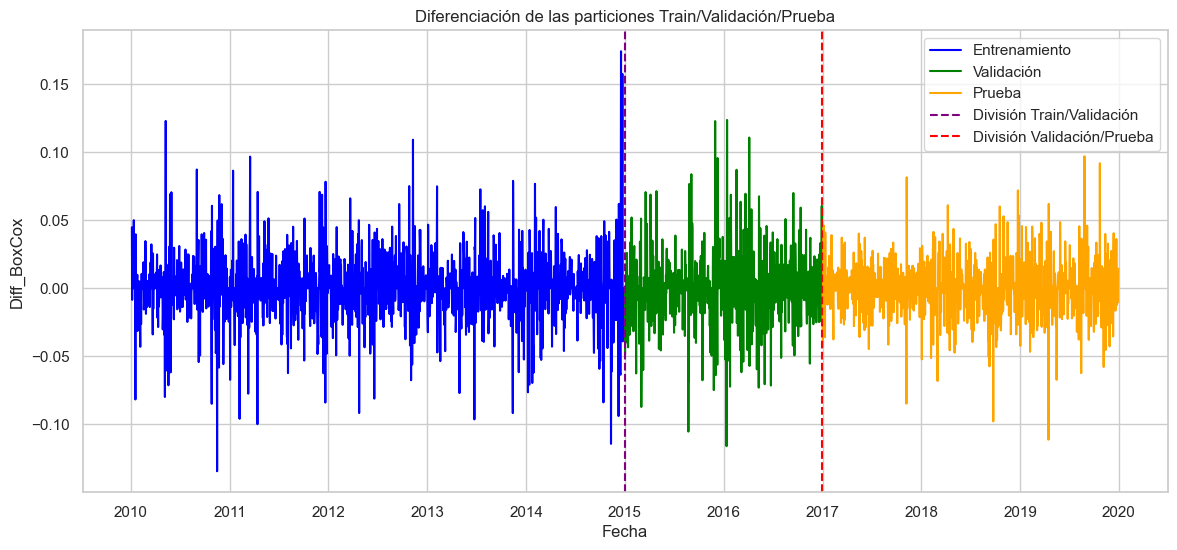

In [207]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la columna 'Fecha' a datetime si aún no lo es
DIFF['Fecha'] = pd.to_datetime(DIFF['Fecha'])

# Crear la gráfica
plt.figure(figsize=(14, 6))

# Graficar los datos de entrenamiento
plt.plot(Apertura_train['Fecha'], Apertura_train['Diff_BoxCox'], 
         label='Entrenamiento', color='blue')

# Graficar los datos de validación
plt.plot(Apertura_validation['Fecha'], Apertura_validation['Diff_BoxCox'], 
         label='Validación', color='green')

# Graficar los datos de prueba
plt.plot(Apertura_test['Fecha'], Apertura_test['Diff_BoxCox'], 
         label='Prueba', color='orange')

# Añadir líneas verticales para separar los conjuntos
split_date_validation = Apertura_validation['Fecha'].iloc[0]
split_date_test = Apertura_test['Fecha'].iloc[0]
plt.axvline(x=split_date_validation, color='purple', linestyle='--', label='División Train/Validación')
plt.axvline(x=split_date_test, color='red', linestyle='--', label='División Validación/Prueba')

# Configurar el título y las etiquetas
plt.title('Diferenciación de las particiones Train/Validación/Prueba')
plt.xlabel('Fecha')
plt.ylabel('Diff_BoxCox')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [116]:
365*3

1095

Como observamos en el grafico anterior vamos a tomar un total del $70\%$ para el conjunto de entrenamiento y un $30\%$ para el conjunto de prueba. 

Tenenemos una baga idea de los rezagos que pueden ser elegido para la tarea de entrenar el árbol de decisión por tanto no disponemos a realizar el entrenamiento del arbol de la siguiennte manera: 
 - Usando la función de ForecasterAutoreg del paquete skforecast.ForecasterAutoreg
 - Para la eleccion de los rezagos no tiene mucho sentido pesar en una periodicidad semanal, pero al hacer el análisis del periodo nos encontramos con que el periodo es de 7 por lo tanto usaremos ese periodo y trateremos de incluir algunos otros rezagos que pueden resultar utiles basandonos en un periodo multiplo de 7
     - Rezagos del 1 al 7 (La ultima semana)
     - Rezagos del 1 al 7 y luego 14, 21, 28 y 30(Semanal hasta completar el mes)
     - Rezagos del 1 al 7 y luego 28, 56, 84 y 112 (Mensual)
     - Rezagos del 1 al 7 y luego rezagos multiplos de 7 hasta el 112

In [115]:
Rzg = []
for i in range(7, 71, 7):
    Rzg.append(i)

print(Rzg)

[7, 14, 21, 28, 35, 42, 49, 56, 63, 70]


In [216]:
rezagos = [[1],[7],[1,7],
          [1,2,3,4,5,6,7],
          [1,2,3,4,5,6,7,14,21,28,30],
          [1,2,3,4,5,6,7,28,56,84,112],
          [1,2,3,4,5,6,7,14,21,28,35,42,49,56,63,70]]

# Definir los hiperparámetros para la búsqueda
hiperparametros = {
    'max_depth': list(range(5, 12)),
    'min_samples_leaf': list(range(20, 30)),
    #'min_samples_split': list(range(2, 20)),
    #'max_features': [None, 'sqrt', 'log2'],
    #'max_leaf_nodes': list(range(10, 100, 10)),
    #'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

In [217]:
DT_Apertura = ForecasterAutoreg(
    regressor = DecisionTreeRegressor(random_state = 123),
    lags = 7 
)

In [218]:
# Realizar la búsqueda de hiperparámetros usando solo los conjuntos de entrenamiento y validación
tuning = grid_search_forecaster(
    forecaster=DT_Apertura,
    y=pd.concat([Apertura_train_series, Apertura_validation_series]),
    param_grid=hiperparametros,
    lags_grid=rezagos,
    steps=1,
    refit=True,
    metric='mean_squared_error',
    initial_train_size=len(Apertura_train_series),
    fixed_train_size=False,
    return_best=True,
    verbose=False,
    show_progress=True
)

Number of models compared: 1470.


lags grid:   0%|          | 0/7 [00:00<?, ?it/s]

params grid:   0%|          | 0/210 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6 7] 
  Parameters: {'ccp_alpha': 0.01, 'max_depth': 8, 'min_samples_leaf': 24}
  Backtesting metric: 0.0006228070444511082



In [ ]:
# Suponiendo que tuning es un DataFrame con los resultados de la búsqueda de hiperparámetros
tuning_results = pd.DataFrame(tuning)

# Guardar los resultados en un archivo CSV
tuning_results.to_csv('Tree1_Apertura.csv', index=False)

In [251]:
# Encuentra los mejores parámetros basados en el MSE más bajo
best_params = tuning.loc[tuning['mean_squared_error'].idxmin(), 'params']

# Muestra los mejores parámetros encontrados
print(f'Mejor conjunto de parámetros: {best_params}')

# Crea el modelo base con los mejores parámetros
modelo_base = DecisionTreeRegressor(**best_params)

Mejor conjunto de parámetros: {'ccp_alpha': 0.1, 'max_depth': 5, 'min_samples_leaf': 20}


In [239]:
tuning = tuning.sort_values(by = ['mean_squared_error', 'max_depth', 'min_samples_leaf'])
tuning

lags             lags_label  \
770  [1, 2, 3, 4, 5, 6, 7]  [1, 2, 3, 4, 5, 6, 7]   
490                 [1, 7]                 [1, 7]   
350                    [7]                    [7]   
560                 [1, 7]                 [1, 7]   
700  [1, 2, 3, 4, 5, 6, 7]  [1, 2, 3, 4, 5, 6, 7]   
..                     ...                    ...   
691  [1, 2, 3, 4, 5, 6, 7]  [1, 2, 3, 4, 5, 6, 7]   
692  [1, 2, 3, 4, 5, 6, 7]  [1, 2, 3, 4, 5, 6, 7]   
684  [1, 2, 3, 4, 5, 6, 7]  [1, 2, 3, 4, 5, 6, 7]   
693  [1, 2, 3, 4, 5, 6, 7]  [1, 2, 3, 4, 5, 6, 7]   
694  [1, 2, 3, 4, 5, 6, 7]  [1, 2, 3, 4, 5, 6, 7]   

                                                params  mean_squared_error  \
770  {'ccp_alpha': 0.1, 'max_depth': 5, 'min_sample...            0.000623   
490  {'ccp_alpha': 0.01, 'max_depth': 5, 'min_sampl...            0.000623   
350  {'ccp_alpha': 0.1, 'max_depth': 5, 'min_sample...            0.000623   
560  {'ccp_alpha': 0.1, 'max_depth': 5, 'min_sample...            0.000623   
700  {'ccp_alpha': 0.01, 'max_depth': 5, 'min_sampl...            0.000623   
..                                                 ...                 ...   
691  {'ccp_alpha': 0.0, 'max_depth': 11, 'min_sampl...            0.000699   
692  {'ccp_alpha': 0.0, 'max_depth': 11, 'min_sampl...            0.000700   
684  {'ccp_alpha': 0.0, 'max_depth': 10, 'min_sampl...            0.000701   
693  {'ccp_alpha': 0.0, 'max_depth': 11, 'min_sampl...            0.000703   
694  {'ccp_alpha': 0.0, 'max_depth': 11, 'min_sampl...            0.000705   

     ccp_alpha  max_depth  min_samples_leaf  
770       0.10        5.0              20.0  
490       0.01        5.0              20.0  
350       0.10        5.0              20.0  
560       0.10        5.0              20.0  
700       0.01        5.0              20.0  
..         ...        ...               ...  
691       0.00       11.0              21.0  
692       0.00       11.0              22.0  
684       0.00       10.0              24.0  
693       0.00       11.0              23.0  
694       0.00       11.0              24.0  

[1470 rows x 7 columns]

In [240]:
tuning1 = tuning[0:1]
tuning1['model'] = 'decission tree'
tuning1

lags             lags_label  \
770  [1, 2, 3, 4, 5, 6, 7]  [1, 2, 3, 4, 5, 6, 7]   

                                                params  mean_squared_error  \
770  {'ccp_alpha': 0.1, 'max_depth': 5, 'min_sample...            0.000623   

     ccp_alpha  max_depth  min_samples_leaf           model  
770        0.1        5.0              20.0  decission tree

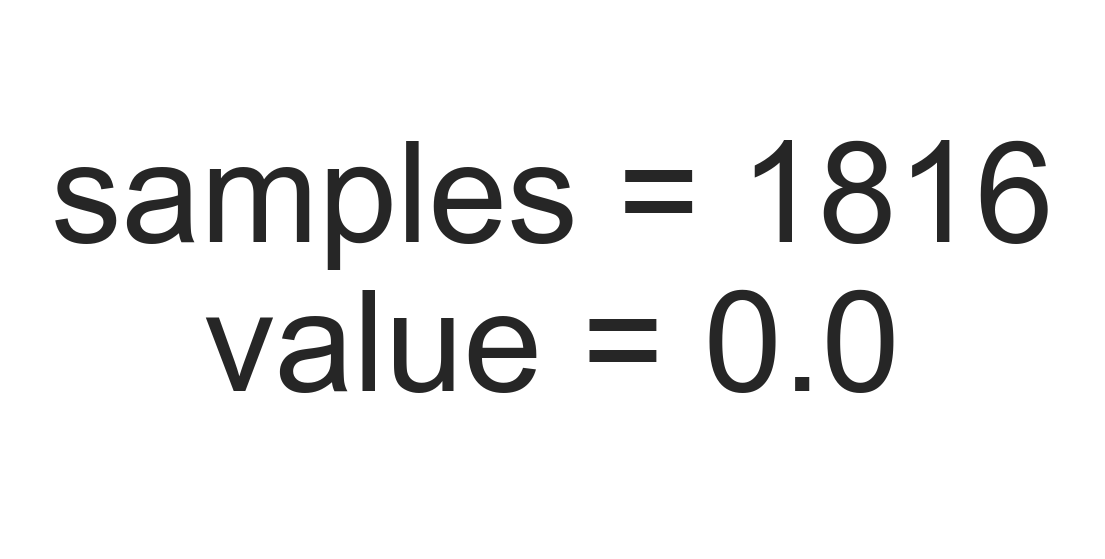

In [225]:
# Crear una visualización del árbol
plot.figure(figsize=(14,7))
plot_tree(DT_Apertura.regressor, #max_depth = 5,
          filled=True, feature_names=DT_Apertura.lags, rounded = True,
          impurity = False, label = 'root')
plot.show()

In [241]:
DT_Apertura.get_feature_importances()['importance']

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: importance, dtype: float64

In [242]:
DT_Apertura = ForecasterAutoreg(
    regressor = DecisionTreeRegressor(random_state = 123, max_depth=5, min_samples_leaf=20, ccp_alpha= 0.1),
    lags = 4
)

DT_Apertura.fit(Apertura_train_series)

In [243]:
predicciones = DT_Apertura.predict(1095)
predicciones

1824    0.000031
1825    0.000031
1826    0.000031
1827    0.000031
1828    0.000031
          ...   
2914    0.000031
2915    0.000031
2916    0.000031
2917    0.000031
2918    0.000031
Name: pred, Length: 1095, dtype: float64

In [244]:
MSE = mean_squared_error(y_true = Apertura_test_series, y_pred =predicciones)

tuning1['MSE test'] =  MSE
tuning1

lags             lags_label  \
770  [1, 2, 3, 4, 5, 6, 7]  [1, 2, 3, 4, 5, 6, 7]   

                                                params  mean_squared_error  \
770  {'ccp_alpha': 0.1, 'max_depth': 5, 'min_sample...            0.000623   

     ccp_alpha  max_depth  min_samples_leaf           model  MSE test  
770        0.1        5.0              20.0  decission tree  0.000336

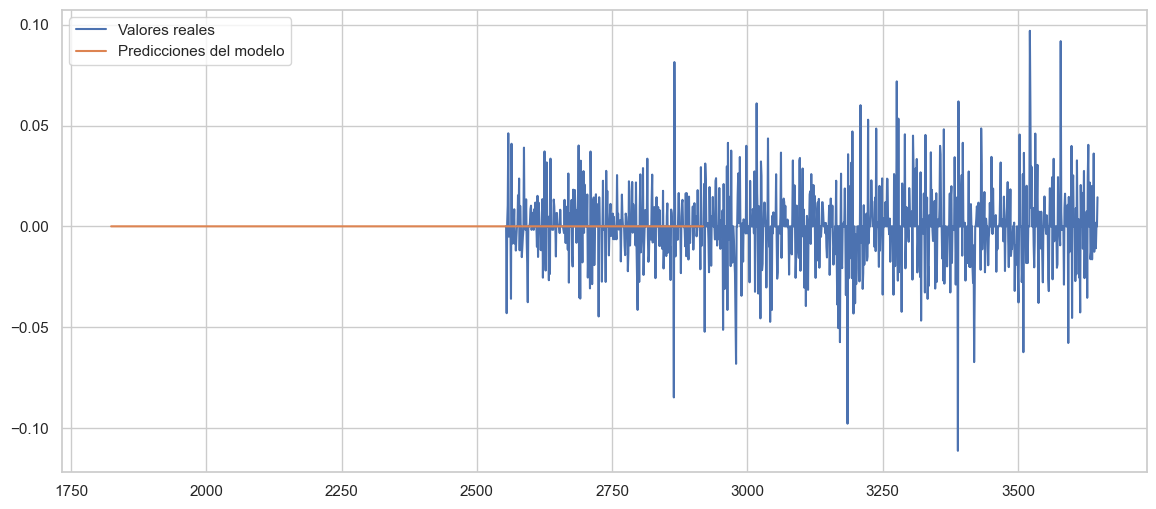

In [245]:
plt.figure(figsize=(14, 6))
plt.plot(Apertura_test_series, label='Valores reales')
plt.plot(predicciones, label='Predicciones del modelo')
plt.legend()
plt.show()

In [246]:
import numpy as np
from scipy.special import inv_boxcox

# Paso 1: Revertir la diferenciación
# Suponiendo que 'BoxCox' es la serie original antes de la diferenciación
reverted_diff = np.cumsum(np.insert(DIFF['Diff_BoxCox'], 0, BoxCox[0]))

# Paso 2: Revertir la transformación Box-Cox
# 'lambda_boxcox' es el parámetro de la transformación Box-Cox utilizada anteriormente
lambda_boxcox = 0.17071798004770206  
reverted_series = inv_boxcox(reverted_diff, lambda_boxcox)
print(reverted_series)

[18.98 19.5  19.4  ... 18.12 18.12 18.28]


In [247]:
int(len(reverted_series))

3648

In [248]:
predicciones = DT_Apertura.predict(3648)

In [249]:
import numpy as np
from scipy.special import inv_boxcox

# Paso 1: Revertir la diferenciación
# Suponiendo que 'BoxCox' es la serie original antes de la diferenciación
Preverted_diff = np.cumsum(np.insert(predicciones, 0, BoxCox[0]))

# Paso 2: Revertir la transformación Box-Cox
# 'lambda_boxcox' es el parámetro de la transformación Box-Cox utilizada anteriormente
lambda_boxcox = 0.17071798004770206  
Preverted_series = inv_boxcox(reverted_diff, lambda_boxcox)
print(Preverted_series)

[18.98 19.5  19.4  ... 18.12 18.12 18.28]


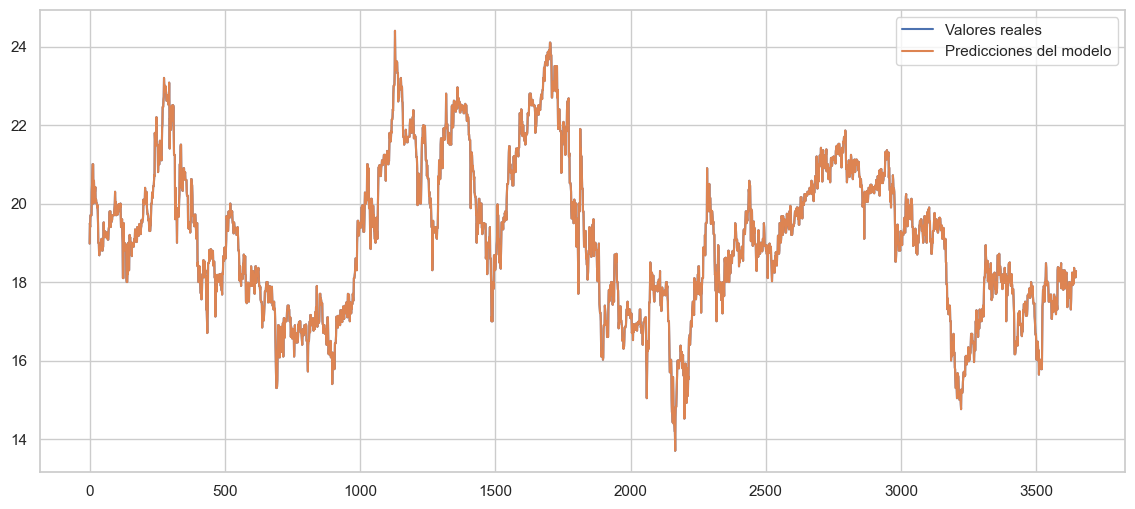

In [250]:
plt.figure(figsize=(14, 6))
plt.plot(reverted_series, label='Valores reales')
plt.plot(Preverted_series, label='Predicciones del modelo')
plt.legend()
plt.show()

In [188]:
mean_squared_error(y_true = reverted_series, y_pred =Preverted_series)

0.0

In [60]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [61]:
DIFF = diff_df
print(DIFF.head())
type(DIFF)

       Fecha  Diff_BoxCox
1 2010-01-05     0.044777
2 2010-01-06    -0.008533
3 2010-01-07     0.025492
4 2010-01-08     0.000000
5 2010-01-09     0.000000


pandas.core.frame.DataFrame

In [62]:
DIFF.size

7294

In [63]:
DIF = pd.Series(DIFF['Diff_BoxCox'].values, index = DIFF['Fecha'])
print(DIF.head())
print(DIF.size)
print(type(DIF))

Fecha
2010-01-05    0.044777
2010-01-06   -0.008533
2010-01-07    0.025492
2010-01-08    0.000000
2010-01-09    0.000000
dtype: float64
3647
<class 'pandas.core.series.Series'>


In [64]:
df1 = pd.DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [65]:
# Generar los primeros 7 rezagos
for i in range(7, 0, -1):
    df1['t-'+str(i)] = DIF.shift(i)

# Generar rezagos que son múltiplos de 7 hasta 70
#for i in range(7, 71, 7):
#    df1['t-'+str(i)] = DIF.shift(i)

In [66]:
# Crear la columna 't' con los valores originales de la serie de tiempo
df1['t'] = DIF.values

# Imprimir el DataFrame resultante
print(df1.head(13))

                 t-7       t-6       t-5       t-4       t-3       t-2  \
Fecha                                                                    
2010-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-07       NaN       NaN       NaN       NaN       NaN  0.044777   
2010-01-08       NaN       NaN       NaN       NaN  0.044777 -0.008533   
2010-01-09       NaN       NaN       NaN  0.044777 -0.008533  0.025492   
2010-01-10       NaN       NaN  0.044777 -0.008533  0.025492  0.000000   
2010-01-11       NaN  0.044777 -0.008533  0.025492  0.000000  0.000000   
2010-01-12  0.044777 -0.008533  0.025492  0.000000  0.000000  0.000000   
2010-01-13 -0.008533  0.025492  0.000000  0.000000  0.000000  0.000000   
2010-01-14  0.025492  0.000000  0.000000  0.000000  0.000000  0.050033   
2010-01-15  0.000000  0.000000  0.000000  0.000000  0.050033  0.016405   
2010-01-16  0.000000  0.000000  0.0000

In [67]:
# Filtrar filas para eliminar aquellas con valores NaN (debido a los rezagos)
df2 = df1.dropna()

# Mostrar el DataFrame resultante
print(df2)

                 t-7       t-6       t-5       t-4       t-3       t-2  \
Fecha                                                                    
2010-01-12  0.044777 -0.008533  0.025492  0.000000  0.000000  0.000000   
2010-01-13 -0.008533  0.025492  0.000000  0.000000  0.000000  0.000000   
2010-01-14  0.025492  0.000000  0.000000  0.000000  0.000000  0.050033   
2010-01-15  0.000000  0.000000  0.000000  0.000000  0.050033  0.016405   
2010-01-16  0.000000  0.000000  0.000000  0.050033  0.016405  0.024361   
...              ...       ...       ...       ...       ...       ...   
2019-12-26  0.019992 -0.016342  0.000000  0.000000  0.036134 -0.012572   
2019-12-27 -0.016342  0.000000  0.000000  0.036134 -0.012572  0.000000   
2019-12-28  0.000000  0.000000  0.036134 -0.012572  0.000000  0.001801   
2019-12-29  0.000000  0.036134 -0.012572  0.000000  0.001801 -0.010830   
2019-12-30  0.036134 -0.012572  0.000000  0.001801 -0.010830  0.000000   

                 t-1         t  
Fech

In [68]:
# Dividir los datos en características (X1) y etiquetas (y1)
df3 = df2.values
X1 = df3[:, :-1]  # Todas las columnas excepto la última
y1 = df3[:, -1]   # Solo la última columna

# Imprimir los conjuntos de características y etiquetas
print(X1)
print(y1)

[[ 0.04477702 -0.00853342  0.02549194 ...  0.          0.
   0.        ]
 [-0.00853342  0.02549194  0.         ...  0.          0.
   0.05003284]
 [ 0.02549194  0.          0.         ...  0.          0.05003284
   0.01640514]
 ...
 [ 0.          0.          0.0361336  ...  0.          0.00180087
  -0.01082989]
 [ 0.          0.0361336  -0.01257183 ...  0.00180087 -0.01082989
   0.        ]
 [ 0.0361336  -0.01257183  0.         ... -0.01082989  0.
   0.        ]]
[0.05003284 0.01640514 0.02436057 ... 0.         0.         0.01442672]


In [69]:
print(X1[1])
print(y1[1])

[-0.00853342  0.02549194  0.          0.          0.          0.
  0.05003284]
0.016405137830997507


In [70]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 3640
2548 364 728
Train + Validation + Test: 3640


In [71]:
Y1 = y1
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)+1  #Set split
testtarget_size = int(len(Y1) * 0.20)   #Set split
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 3640
Training Observations for Target: 2548
Validation Observations for Target: 365
Test Observations for Target: 727


In [72]:
# Features Train--Val-Test split

trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 3640
Training Observations for Feature: 2548
Validation Observations for Feature: 365
Test Observations for Feature: 727


In [73]:
from sklearn.tree import DecisionTreeRegressor

DT_Apertura = DecisionTreeRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: -2.3514657348593597
el RECM sobre validación es: 0.0007110696325023905


- El R^2 es negativo esto indica que el modelo está no ajustando a los datos de entrenamiento.
- El R^2 en el conjunto de validación tambien es negativo 
- El RECM (Raíz del Error Cuadrático Medio) es una medida de la magnitud promedio del error de las predicciones del modelo en el conjunto de validación. Un RECM más bajo indica mejores predicciones. En este caso, el RECM nos dice que no se esta explicando nada del modelo en promedio

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convertir val_target a una serie de pandas
val_target_series = pd.Series(val_target)

# Calcular la media y desviación estándar
train_mean = np.mean(train_target)
train_std = np.std(train_target)
val_mean = np.mean(val_target)
val_std = np.std(val_target)

print(f"Media de entrenamiento: {train_mean}")
print(f"Desviación estándar de entrenamiento: {train_std}")
print(f"Media de validación: {val_mean}")
print(f"Desviación estándar de validación: {val_std}")

Media de entrenamiento: -2.3545783822840152e-05
Desviación estándar de entrenamiento: 0.023085507137042043
Media de validación: 0.000421970506241006
Desviación estándar de validación: 0.014565945279166579


El hecho de que el RECM del modelo (0.124789) sea significativamente menor que la desviación estándar de la validación (0.554668) y menor que el RECM del modelo de persistencia (0.199976) indica que el modelo está capturando bien la variabilidad de los datos.

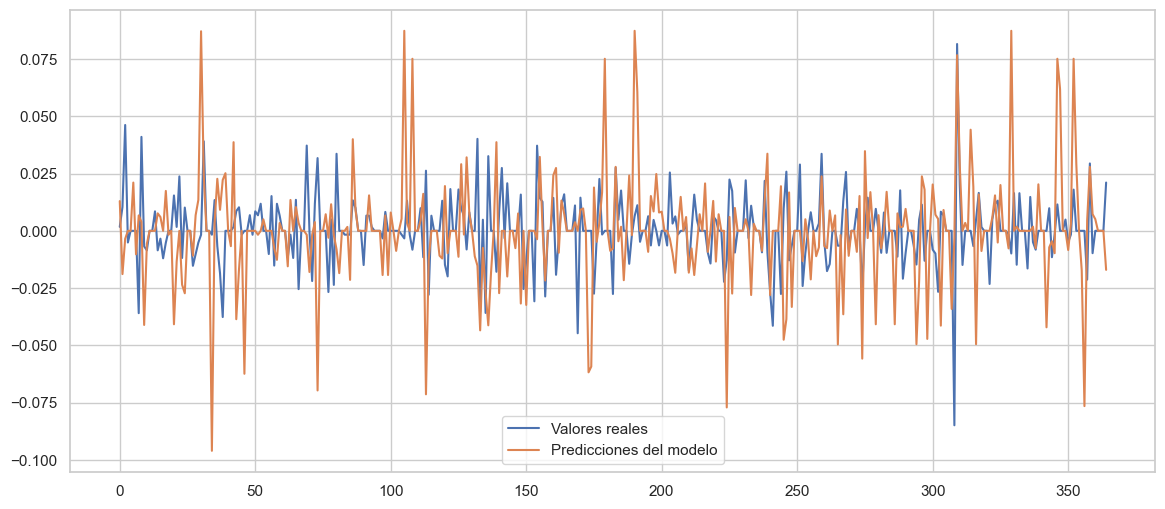

In [75]:
val_predictions = DT_Apertura.predict(val_feature)

plt.figure(figsize=(14, 6))
plt.plot(val_target, label='Valores reales')
plt.plot(val_predictions, label='Predicciones del modelo')
plt.legend()
plt.show()

In [76]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear un DataFrame para almacenar los resultados
tuning_results = pd.DataFrame(columns=['max_depth', 'steps', 'R2_train', 'R2_val', 'RMSE_val'])

# Definir los valores de max_depth y pasos que deseas probar
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
steps_ahead = [1]

# Función para crear características para pasos adelante
def create_lagged_features(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:(i + steps)])
        y.append(data[i + steps])
    return np.array(X), np.array(y)

for steps in steps_ahead:
    best_rmse = float('inf')
    best_model = None
    best_params = None
    
    for depth in max_depth_values:
        print(f'{"="*12} Entrenando el modelo con max_depth={depth} y {steps} pasos adelante {"="*12}')
        
        # Crear características y objetivos para el número de pasos adelante
        train_X, train_y = create_lagged_features(train_feature.flatten(), steps)
        val_X, val_y = create_lagged_features(val_feature.flatten(), steps)

        # Crear y ajustar el modelo
        AperturaDT = DecisionTreeRegressor(max_depth=depth)
        AperturaDT.fit(train_X, train_y)

        # Evaluar el modelo
        R2_train = AperturaDT.score(train_X, train_y)
        R2_val = AperturaDT.score(val_X, val_y)
        RMSE_val = mean_squared_error(val_y, AperturaDT.predict(val_X), squared=False)

        # Almacenar los mejores resultados
        if RMSE_val < best_rmse:
            best_rmse = RMSE_val
            best_model = AperturaDT
            best_params = (depth, steps, R2_train, R2_val, RMSE_val)

    # Almacenar los mejores resultados en el DataFrame usando loc
    tuning_results.loc[len(tuning_results)] = best_params
    print(f"Mejor modelo para {steps} pasos adelante:")
    print(f"max_depth={best_params[0]}")
    print(f"Coeficiente R2 sobre el conjunto de entrenamiento: {best_params[2]}")
    print(f"Coeficiente R2 sobre el conjunto de validación: {best_params[3]}")
    print(f"RECM sobre el conjunto de validación: {best_params[4]}\n")

# Mostrar los resultados finales
print("Resultados del tuning de max_depth y pasos adelante:")
print(tuning_results)

============ Entrenando el modelo con max_depth=2 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=3 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=4 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=5 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=6 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=7 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=8 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=9 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=10 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=11 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=12 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=13 y 1 pasos adelante ============
============

Para este caso la profundidad con mejor RMSE **AQUI ES MAX_DEPTH 10, 1 STEP y MSE 0.015017**

In [77]:
# Importar la función para poda por complejidad de costo
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Obtener el mejor modelo encontrado
best_max_depth = 6  # Cambiar según el mejor resultado obtenido
best_steps = 1      # Cambiar según el mejor resultado obtenido

# Crear y ajustar el modelo con el mejor max_depth y steps
AperturaDT = DecisionTreeRegressor(max_depth=best_max_depth)
train_X, train_y = create_lagged_features(train_feature.flatten(), best_steps)
val_X, val_y = create_lagged_features(val_feature.flatten(), best_steps)
AperturaDT.fit(train_X, train_y)

# Obtener el camino de poda por complejidad de costo
path = AperturaDT.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Imprimir las alphas encontradas
print("Alphas encontradas:", ccp_alphas)
print("Alpha mínimo:", ccp_alphas.min())
print("Alpha máximo:", ccp_alphas.max())

# Definir el número de divisiones para explorar las alphas
div = 25

Alphas encontradas: [0.00000000e+00 3.58479680e-11 6.04884350e-10 6.52733568e-09
 1.91784022e-08 4.10759511e-08 4.48310383e-08 5.94549679e-08
 8.63755607e-08 1.45791576e-07 1.80826358e-07 2.41770637e-07
 3.23637418e-07 3.27408932e-07 3.55044316e-07 4.22498649e-07
 4.23925074e-07 4.32062435e-07 5.84320879e-07 6.23819408e-07
 7.79550507e-07 8.27270588e-07 8.51729886e-07 9.99855276e-07
 1.00089916e-06 1.18165444e-06 1.19086686e-06 1.39997539e-06
 1.93723470e-06 2.08631436e-06 3.95920144e-06]
Alpha mínimo: 0.0
Alpha máximo: 3.959201441119421e-06


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Obtener el camino de poda por complejidad de costo
path = AperturaDT.cost_complexity_pruning_path(train_feature, train_target)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Lista para almacenar los RMSE de entrenamiento y prueba
rmse_train, rmse_test = [], []

# Iterar sobre los valores de alpha
for alpha in ccp_alphas:
    # Crear y ajustar el modelo con el valor de alpha actual
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    tree.fit(train_feature, train_target)
    
    # Predecir sobre conjunto de entrenamiento y validación
    y_train_pred = tree.predict(train_feature)
    y_val_pred = tree.predict(val_feature)

    # Calcular el RMSE
    rmse_train.append(np.sqrt(mean_squared_error(train_target, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(val_target, y_val_pred)))

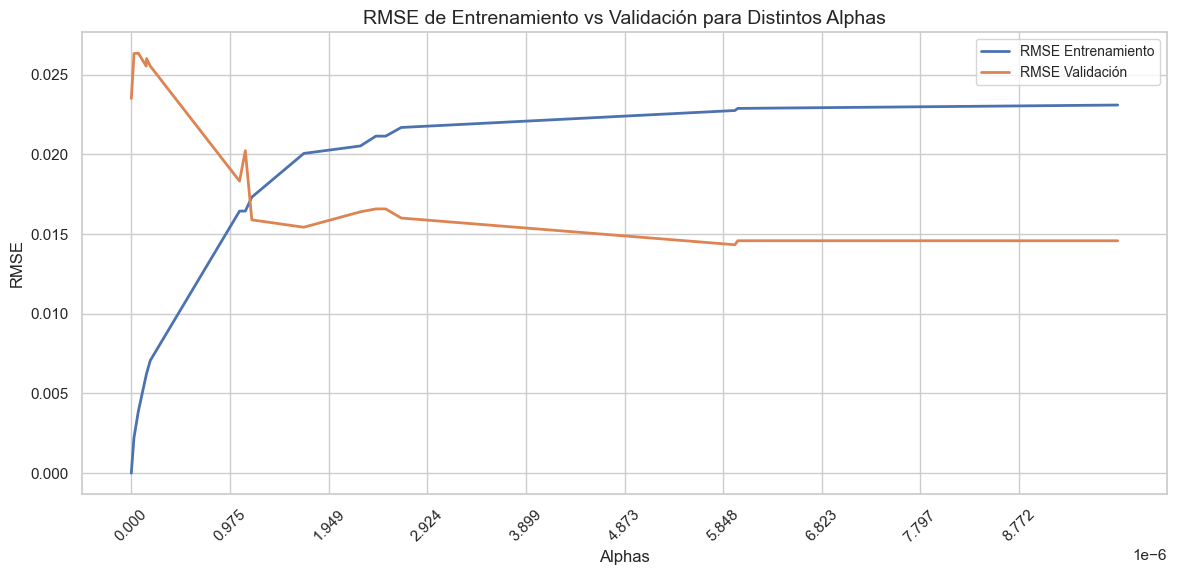

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura y un eje de tamaño adecuado
plt.figure(figsize=(14, 6))

# Graficar las líneas de entrenamiento y prueba
sns.lineplot(x=ccp_alphas, y=rmse_train, label="RMSE Entrenamiento", linewidth=2)
sns.lineplot(x=ccp_alphas, y=rmse_test, label="RMSE Validación", linewidth=2)

# Personalizar etiquetas y título
plt.xlabel("Alphas", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE de Entrenamiento vs Validación para Distintos Alphas", fontsize=14)

# Configurar la leyenda
plt.legend(fontsize=10)

# Ajustar las marcas del eje x para que sean más legibles
div = 10  # Divisor para determinar la cantidad de marcas en el eje x
plt.xticks(np.arange(0.00, ccp_alphas.max(), (ccp_alphas.max() - ccp_alphas.min()) / div), rotation=45)

# Mostrar el gráfico
plt.show()

Este gráfico nos indica como varía la precisión del modelo en los datos de prueba y entrenamiento a medida que cambian los valores de alpha. Al ver que las curvas o las líneas son ascendente para ambos conjuntos podemos concluir que el modelo mejora su rendimiento al aumentar los valores de alpha, al parecer no existe una brecha significativa por lo que podemos inferir que no existe un sobre ajuste en el modelo.

In [80]:
####
print(train_feature.shape)
print(val_feature.shape)

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)

(2548, 7)
(365, 7)
(2548,)
(365,)
(2913, 7)
(2913,)


In [81]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth
AperturaDT2 = DecisionTreeRegressor(max_depth=6)  

# Ajustar el modelo con los datos de entrenamiento y validación combinados
AperturaDT2.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction = AperturaDT2.predict(train_val_feature)
test_prediction = AperturaDT2.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse = sklearn.metrics.mean_squared_error(train_val_prediction, train_val_target, squared=False)
test_rmse = sklearn.metrics.mean_squared_error(test_prediction, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse)

Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 0.021334680876953893
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 0.02014620704358165


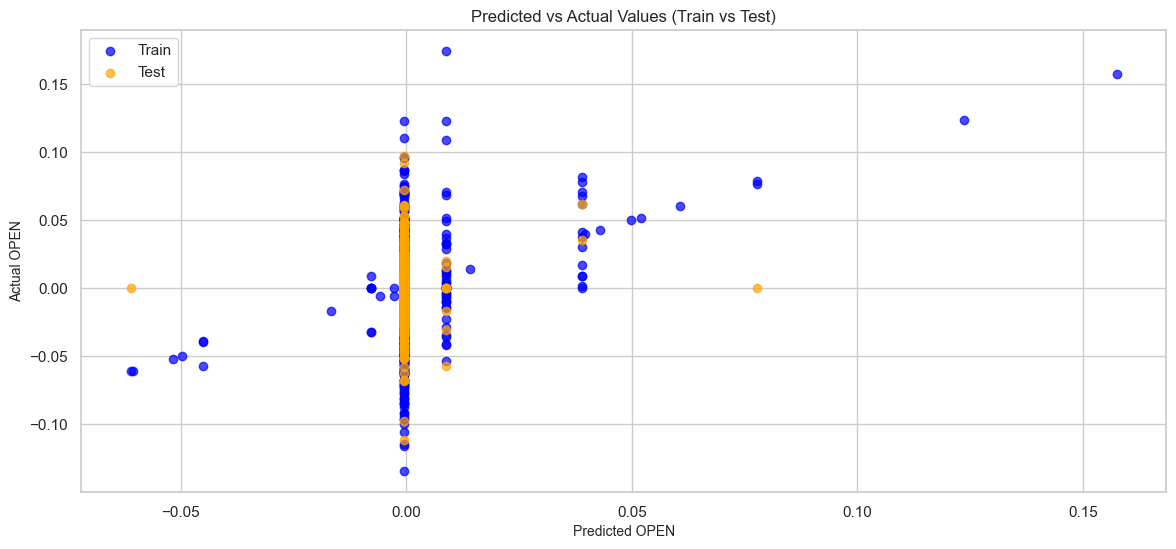

In [82]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(14, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction, test_target, color='orange', alpha=0.7, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=12)
plt.xlabel('Predicted OPEN', fontsize=10)
plt.ylabel('Actual OPEN', fontsize=10)
plt.legend()

# Mostrar el gráfico
plt.show()

In [83]:
from sklearn import tree
import matplotlib.pyplot as plt

# Lista de características y respuesta
listacaract = list(df1.columns.values)
respuesta = listacaract.pop()  # Suponemos que 'respuesta' es el nombre de la columna que quieres predecir

# Crear el árbol de decisión
AperturaDT1 = DecisionTreeRegressor(max_depth= 6)  # Aquí debes definir tu modelo DecisionTreeRegressor
AperturaDT1.fit(df1[listacaract], df1[respuesta])

# Mostrar el texto de representación del árbol
text_representation = tree.export_text(AperturaDT1)
print(text_representation)

|--- feature_2 <= 0.17
|   |--- feature_6 <= -0.07
|   |   |--- feature_5 <= 0.04
|   |   |   |--- feature_3 <= 0.00
|   |   |   |   |--- feature_6 <= -0.11
|   |   |   |   |   |--- feature_2 <= -0.02
|   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |--- feature_2 >  -0.02
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_6 >  -0.11
|   |   |   |   |   |--- feature_6 <= -0.08
|   |   |   |   |   |   |--- value: [0.06]
|   |   |   |   |   |--- feature_6 >  -0.08
|   |   |   |   |   |   |--- value: [0.03]
|   |   |   |--- feature_3 >  0.00
|   |   |   |   |--- feature_1 <= -0.02
|   |   |   |   |   |--- feature_3 <= 0.04
|   |   |   |   |   |   |--- value: [0.04]
|   |   |   |   |   |--- feature_3 >  0.04
|   |   |   |   |   |   |--- value: [0.05]
|   |   |   |   |--- feature_1 >  -0.02
|   |   |   |   |   |--- feature_0 <= 0.03
|   |   |   |   |   |   |--- value: [-0.01]
|   |   |   |   |   |--- feature_0 >  0.03
|   |   |   |   |   |   |--- value: [0

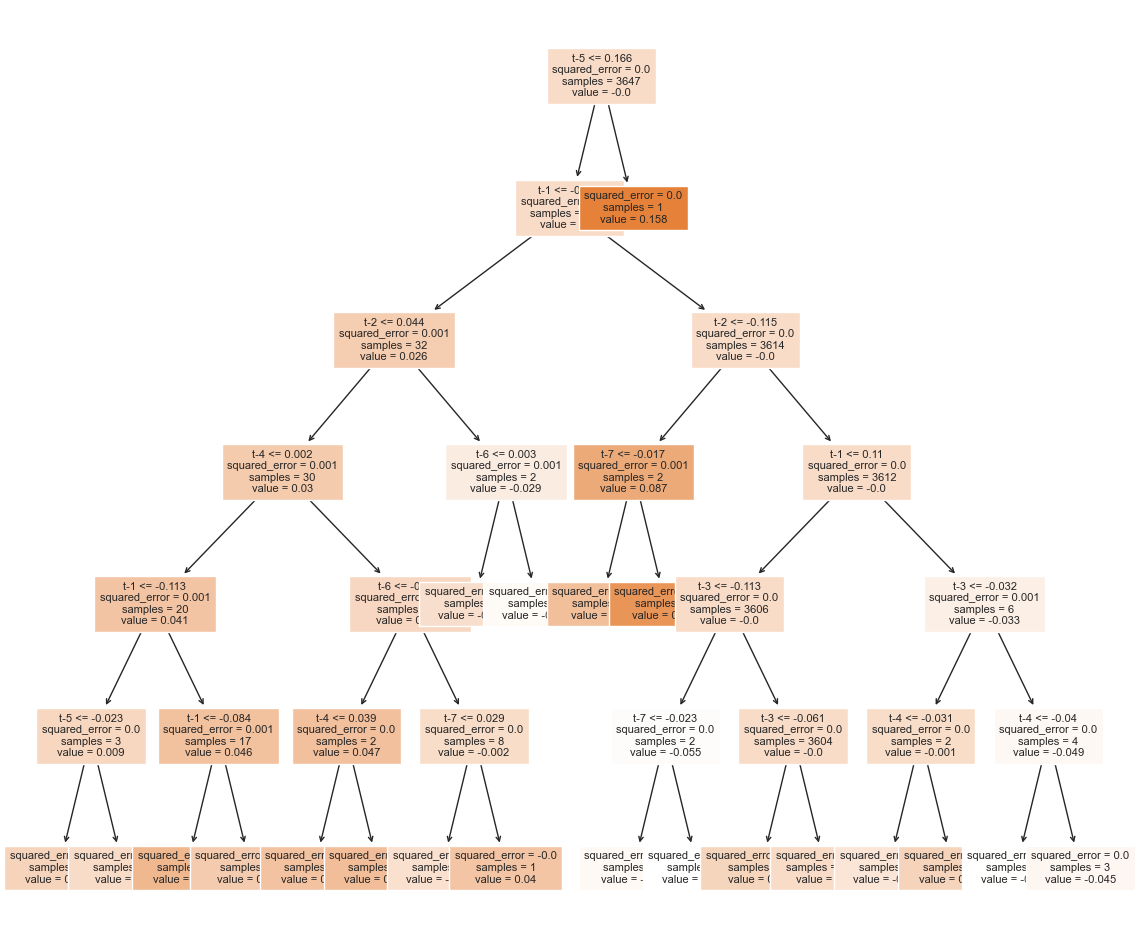

In [84]:
# Configurar y mostrar el gráfico del árbol de decisión
plt.figure(figsize=(14, 12))
_ = tree.plot_tree(AperturaDT1, 
                   feature_names=listacaract, fontsize = 8, 
                   filled=True)

# Mostrar el gráfico
plt.show()

In [85]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

2913
2913
727
727


In [86]:
indicetrian_val_test=df1.index
print(indicetrian_val_test.size)
indicetrain_val=indicetrian_val_test[0:2913]
indicetest=indicetrian_val_test[2913:3647]

3647


In [87]:
print(indicetrain_val.size)
print(indicetest.size)

2913
734


In [88]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

3640
3640


In [89]:
# Recortar el índice para que coincida con la longitud de los datos
indicetrian_val_test_recortado = indicetrian_val_test[:3640]

# Crear el DataFrame utilizando los datos y el índice recortados
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred = pd.DataFrame(data=d, index=indicetrian_val_test_recortado)

# Mostrar el DataFrame resultante
print(ObsvsPred.head(10))

            observado  Predicción
Fecha                            
2010-01-05   0.050033   -0.000451
2010-01-06   0.016405   -0.000451
2010-01-07   0.024361   -0.000451
2010-01-08   0.016079   -0.000451
2010-01-09   0.000000   -0.000451
2010-01-10   0.000000   -0.000451
2010-01-11  -0.081706   -0.000451
2010-01-12   0.039631    0.039631
2010-01-13   0.008159   -0.000451
2010-01-14  -0.022930    0.008817


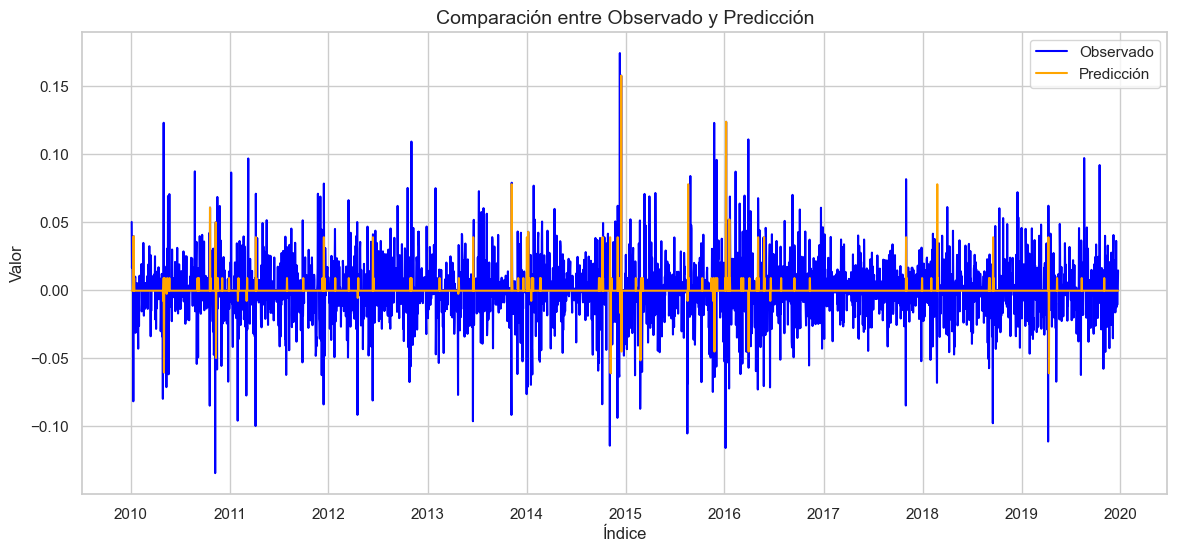

In [90]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(14, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred['observado'], label='Observado', color='blue', linestyle='-')
plt.plot(ObsvsPred['Predicción'], label='Predicción', color='orange', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

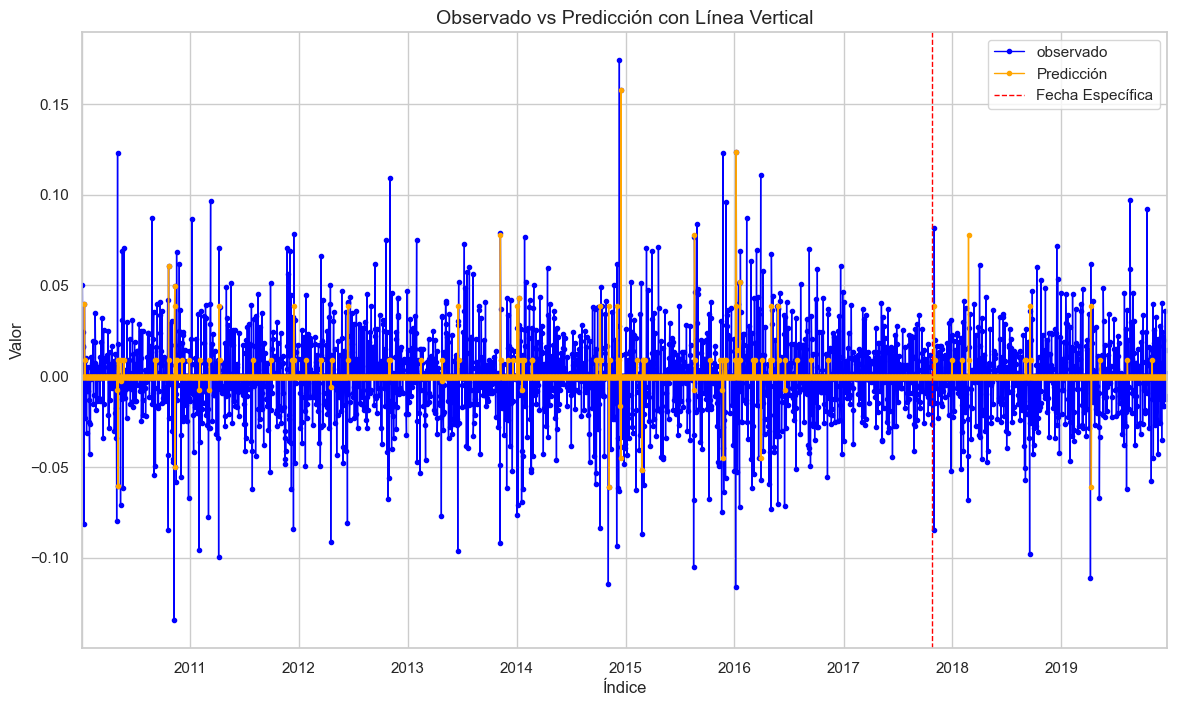

In [91]:
import matplotlib.pyplot as plt

# Configuración del gráfico utilizando Pandas plot y Matplotlib
ax = ObsvsPred.plot(marker='.', figsize=(14, 8), linewidth= 1, color=['blue', 'orange'])  # Cambiar colores de 'observado' y 'predicción'

# Añadir línea vertical en una fecha específica
fecha_vertical = indicetrian_val_test[2848].date()  # Fecha específica para la línea vertical
ax.axvline(x=fecha_vertical, color='red', linestyle='--', linewidth=1, label='Fecha Específica')

# Ajustar etiquetas y título del gráfico
plt.title('Observado vs Predicción con Línea Vertical', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Añadir leyenda al gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

Ahora, para deshacer las transformaciones hechas a la serie y visualizar el resultado en la escala original procedemos a realizar las operaciones inversas a las que hemos aplicado tanto para la serie orginal como para las predicciones. 
 - Para empezar podemos tomar la serie BoxCox antes de la sustracción de la tendencia por Kernel
 - En segundo lugar se hace la operacion inversa de la transformacion de BoxCox

In [92]:
import numpy as np
from scipy.special import inv_boxcox

# Paso 1: Revertir la diferenciación
# Suponiendo que 'BoxCox' es la serie original antes de la diferenciación
reverted_diff = np.cumsum(np.insert(Diff_BoxCox, 0, BoxCox[0]))

# Paso 2: Revertir la transformación Box-Cox
# 'lambda_boxcox' es el parámetro de la transformación Box-Cox utilizada anteriormente
lambda_boxcox = 0.17071798004770206  
reverted_series = inv_boxcox(reverted_diff, lambda_boxcox)
print(reverted_series)

[18.98 19.5  19.4  ... 18.12 18.12 18.28]


In [93]:
SRec = np.insert(ObsvsPred['Predicción'], 0, BoxCox[0]).cumsum()
#SRec = SRec.add(df_BoxCox.iloc[::-1].iloc[0], fill_value = 0)
#SRec = np.insert(SRec, 0, BoxCox[0])
lambda_boxcox = 0.17071798004770206  
SRec = inv_boxcox(SRec, lambda_boxcox)
print(SRec)

[18.98       18.97482448 18.96965013 ... 18.37650362 18.37146494
 18.36642742]


In [94]:
PredCT = ObsvsPred['Predicción']
print(PredCT)

Fecha
2010-01-05   -0.000451
2010-01-06   -0.000451
2010-01-07   -0.000451
2010-01-08   -0.000451
2010-01-09   -0.000451
                ...   
2019-12-19   -0.000451
2019-12-20   -0.000451
2019-12-21   -0.000451
2019-12-22   -0.000451
2019-12-23   -0.000451
Name: Predicción, Length: 3640, dtype: float64


In [95]:
# Paso 1: Revertir la diferenciación
# Suponiendo que 'BoxCox' es la serie original antes de la diferenciación
Preverted_diff = np.cumsum(np.insert(PredCT, 0, BoxCox[0]))

# Paso 2: Revertir la transformación Box-Cox
# 'lambda_boxcox' es el parámetro de la transformación Box-Cox utilizada anteriormente
lambda_boxcox = 0.17071798004770206  
Preverted_series = inv_boxcox(Preverted_diff, lambda_boxcox)
print(Preverted_series)

[18.98       18.97482448 18.96965013 ... 18.37650362 18.37146494
 18.36642742]


In [96]:
print(reverted_series.size)
print(Preverted_series.size)
print(ARGOS['Fecha'][7:].size)

3648
3641
3641


In [97]:
3648 - 3585

63

In [98]:
d_original = {'observado_original': reverted_series[7:], 'Predicción': Preverted_series}
ObsvsPred_original = pd.DataFrame(data=d_original, index=ARGOS['Fecha'][7:])

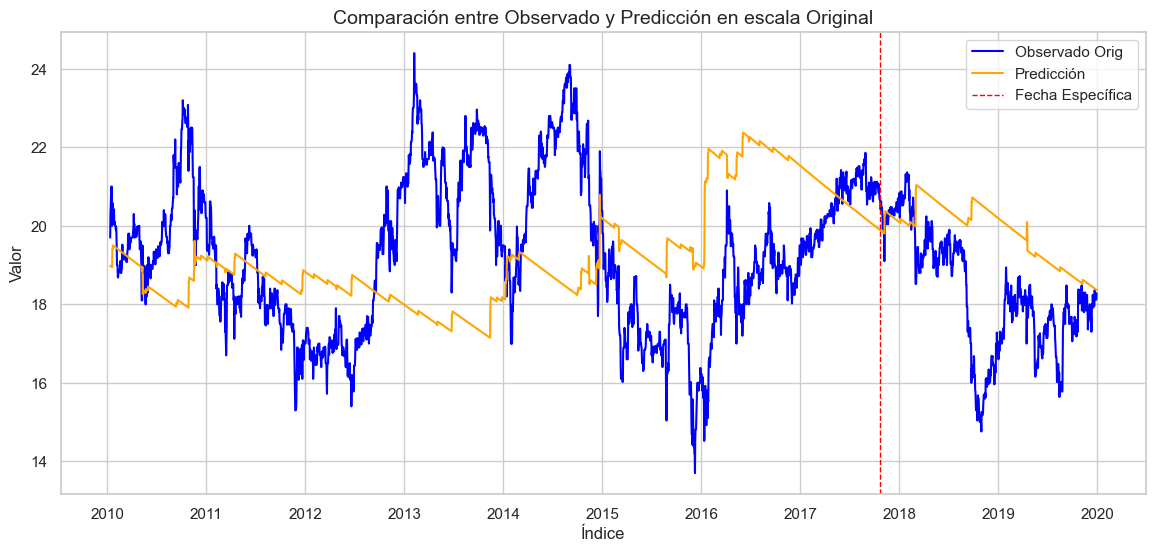

In [99]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(14, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred_original['observado_original'], label='Observado Orig', color='blue', linestyle='-')
plt.plot(ObsvsPred_original['Predicción'], label='Predicción', color='orange', linestyle='-')

# Añadir línea vertical en una fecha específica
ax = plt.gca()  # Obtener el eje actual
fecha_vertical = indicetrian_val_test[2848].date()  # Fecha específica para la línea vertical
ax.axvline(x=fecha_vertical, color='red', linestyle='--', linewidth=1, label='Fecha Específica')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción en escala Original', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [100]:
# Extraer los valores observados y las predicciones
observed = ObsvsPred_original['observado_original']
predicted = ObsvsPred_original['Predicción']

# Calcular el MSE
mse = mean_squared_error(observed, predicted)

# Calcular el RMSE
rmse = np.sqrt(mse)

# Mostrar los resultados
print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)

Error Cuadrático Medio (MSE): 6.126619331220719
Raíz del Error Cuadrático Medio (RMSE): 2.475200866843077


Se puede concluir después de haber probado ambos caminos en referencia a empezar desde la Serie Original o desde la Serie transformada vía BoxCox y luego eliminando la tendencia vía regresión Kernel, que el modelo que mejor ajusto de estos 2 fue el 2do, cosa que además podemos visualizar de una forma más numérica comparando el MSE obtenido de ambos modelos tanto para los conjuntos de prueba como entrenamiento en el cual el modelo de la serie sin tendencia supero o en otras palabras el MSE fue menor en este. 

Sin embargo, aún no estamos seguros de que el modelo de árboles sea la mejor opción para modelar nuestra serie, por eso a continuación se muestran otros modelos. 